In [1]:
# SOLVE THE REGRESSION PROBLEM

# Import the necessary Liabrary from the system

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Read the data from the given path and convert into the Data Frame.

df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv")

# It will show top five elements of the DataFrame

df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [7]:
# It will show last 5 elements of Dataset

df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Total Row and column

df.shape

(16468, 14)

In [9]:
#Total Number of elements

df.size

230552

In [10]:
# It will provide detail information about the Dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


In [11]:
# Drop Unnamed column

df.drop('Unnamed: 0',axis=1,inplace=True)

In [12]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Convert the Date column object datatype into Datetime and create month and day column.

df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12.0,27.0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12.0,20.0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12.0,13.0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,12.0,6.0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Now we can remove date column

df.drop('Date',axis=1,inplace=True)

In [15]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12.0,27.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12.0,20.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12.0,13.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,12.0,6.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Detail information about data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1517 non-null   float64
 1   Total Volume  1517 non-null   float64
 2   4046          1517 non-null   float64
 3   4225          1517 non-null   float64
 4   4770          1517 non-null   float64
 5   Total Bags    1517 non-null   float64
 6   Small Bags    1517 non-null   float64
 7   Large Bags    1517 non-null   float64
 8   XLarge Bags   1517 non-null   float64
 9   type          1517 non-null   object 
 10  year          1517 non-null   float64
 11  region        1517 non-null   object 
 12  Month         1517 non-null   float64
 13  Day           1517 non-null   float64
dtypes: float64(12), object(2)
memory usage: 1.8+ MB


In [17]:
# It will tell us how many Null values is there is Dataset.

df.isnull().sum()

AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
Month           14951
Day             14951
dtype: int64

In [18]:
# Remove the null values

df.dropna(inplace=True)

In [19]:
# Again check null values , no values are there in dataset

df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

In [20]:
# It will show the list of unique element containing by each column

for i in df:
    print(df[i].unique())

[1.33 1.35 0.93 1.08 1.28 1.26 0.99 0.98 1.02 1.07 1.12 1.31 1.11 1.34
 1.45 1.05 1.37 1.27 1.32 1.23 1.19 1.43 1.2  1.22 1.13 1.16 1.06 1.17
 1.24 0.96 1.   1.09 0.95 0.97 1.15 1.01 1.14 1.1  1.04 1.18 1.29 1.25
 1.03 1.39 1.4  1.36 1.3  0.88 1.21 0.9  0.94 0.75 0.77 0.81 0.8  0.72
 0.79 0.67 0.82 0.68 0.76 0.91 1.38 0.92 0.78 0.74 0.62 0.83 0.87 0.73
 0.7  0.89 0.85 1.44 1.42 1.41 0.49 0.53 0.66 0.56 0.6  0.71 0.65 0.58
 0.54 0.52 0.51 0.57 0.63 0.64 0.61 0.84 0.86 0.69 1.52 1.53 1.49 1.48
 1.56 1.62 1.63 1.46 1.51 1.61 1.47 1.66 1.57 1.6  1.5  1.68 1.54 1.64
 1.58]
[ 64236.62  54876.98 118220.22 ... 178410.82 189131.52 182978.3 ]
[ 1036.74   674.28   794.7  ... 46364.75 54110.79 43116.41]
[ 54454.85  44638.81 109149.67 ...  52893.38  53593.58  54193.42]
[   48.16    58.33   130.5  ... 16736.92 17495.42 16563.91]
[ 8696.87  9505.56  8145.35 ... 62415.77 63931.73 69104.56]
[ 8603.62  9408.07  8042.21 ... 53332.61 55653.47 57456.21]
[   93.25    97.49   103.14 ...  8258.16  8278.26 116

In [21]:
# It will show total number of unique element each column containing.

df.nunique()

AveragePrice     113
Total Volume    1517
4046            1517
4225            1517
4770            1516
Total Bags      1517
Small Bags      1517
Large Bags      1377
XLarge Bags      711
type               1
year               2
region            51
Month             12
Day               31
dtype: int64

In [22]:
# It will show the frequency of unique elements.

for i in df:
    print(df[i].value_counts())

AveragePrice
1.08    46
0.99    44
1.03    44
1.10    43
1.09    43
        ..
0.51     1
0.52     1
0.54     1
1.42     1
1.58     1
Name: count, Length: 113, dtype: int64
Total Volume
64236.62      1
332918.70     1
4565207.85    1
4831664.77    1
309024.22     1
             ..
141875.20     1
92599.79      1
98097.37      1
162559.72     1
182978.30     1
Name: count, Length: 1517, dtype: int64
4046
1036.74       1
193228.98     1
2166801.03    1
2295315.43    1
180977.06     1
             ..
93556.40      1
57713.02      1
61125.82      1
110439.42     1
43116.41      1
Name: count, Length: 1517, dtype: int64
4225
54454.85      1
45809.76      1
1226508.86    1
1290847.05    1
46253.49      1
             ..
12101.67      1
9666.15       1
8956.16       1
11892.01      1
54193.42      1
Name: count, Length: 1517, dtype: int64
4770
57.68        2
48.16        1
271514.98    1
392846.12    1
12923.45     1
            ..
834.92       1
796.53       1
995.43       1
411.40       1
1

In [23]:
# It will check the duplicate elements in the Dataset.

df.duplicated().sum()

0

In [24]:
# Encode the categorical column

df['region'].nunique()

51

In [25]:
# Here we can see region has 51 unique categorical elements so it is very complax to encode this and type column has only one 
# category so we will remove region and type column

df['type'].nunique()

1

In [26]:
df.drop(['region','type'],axis=1,inplace=True)

In [27]:
df.shape

(1517, 12)

In [28]:
# It will tell the short story about the dataset.

df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.166777,15.449572
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,3.391243,8.796714
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,6.000000,15.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,9.000000,22.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000,31.000000


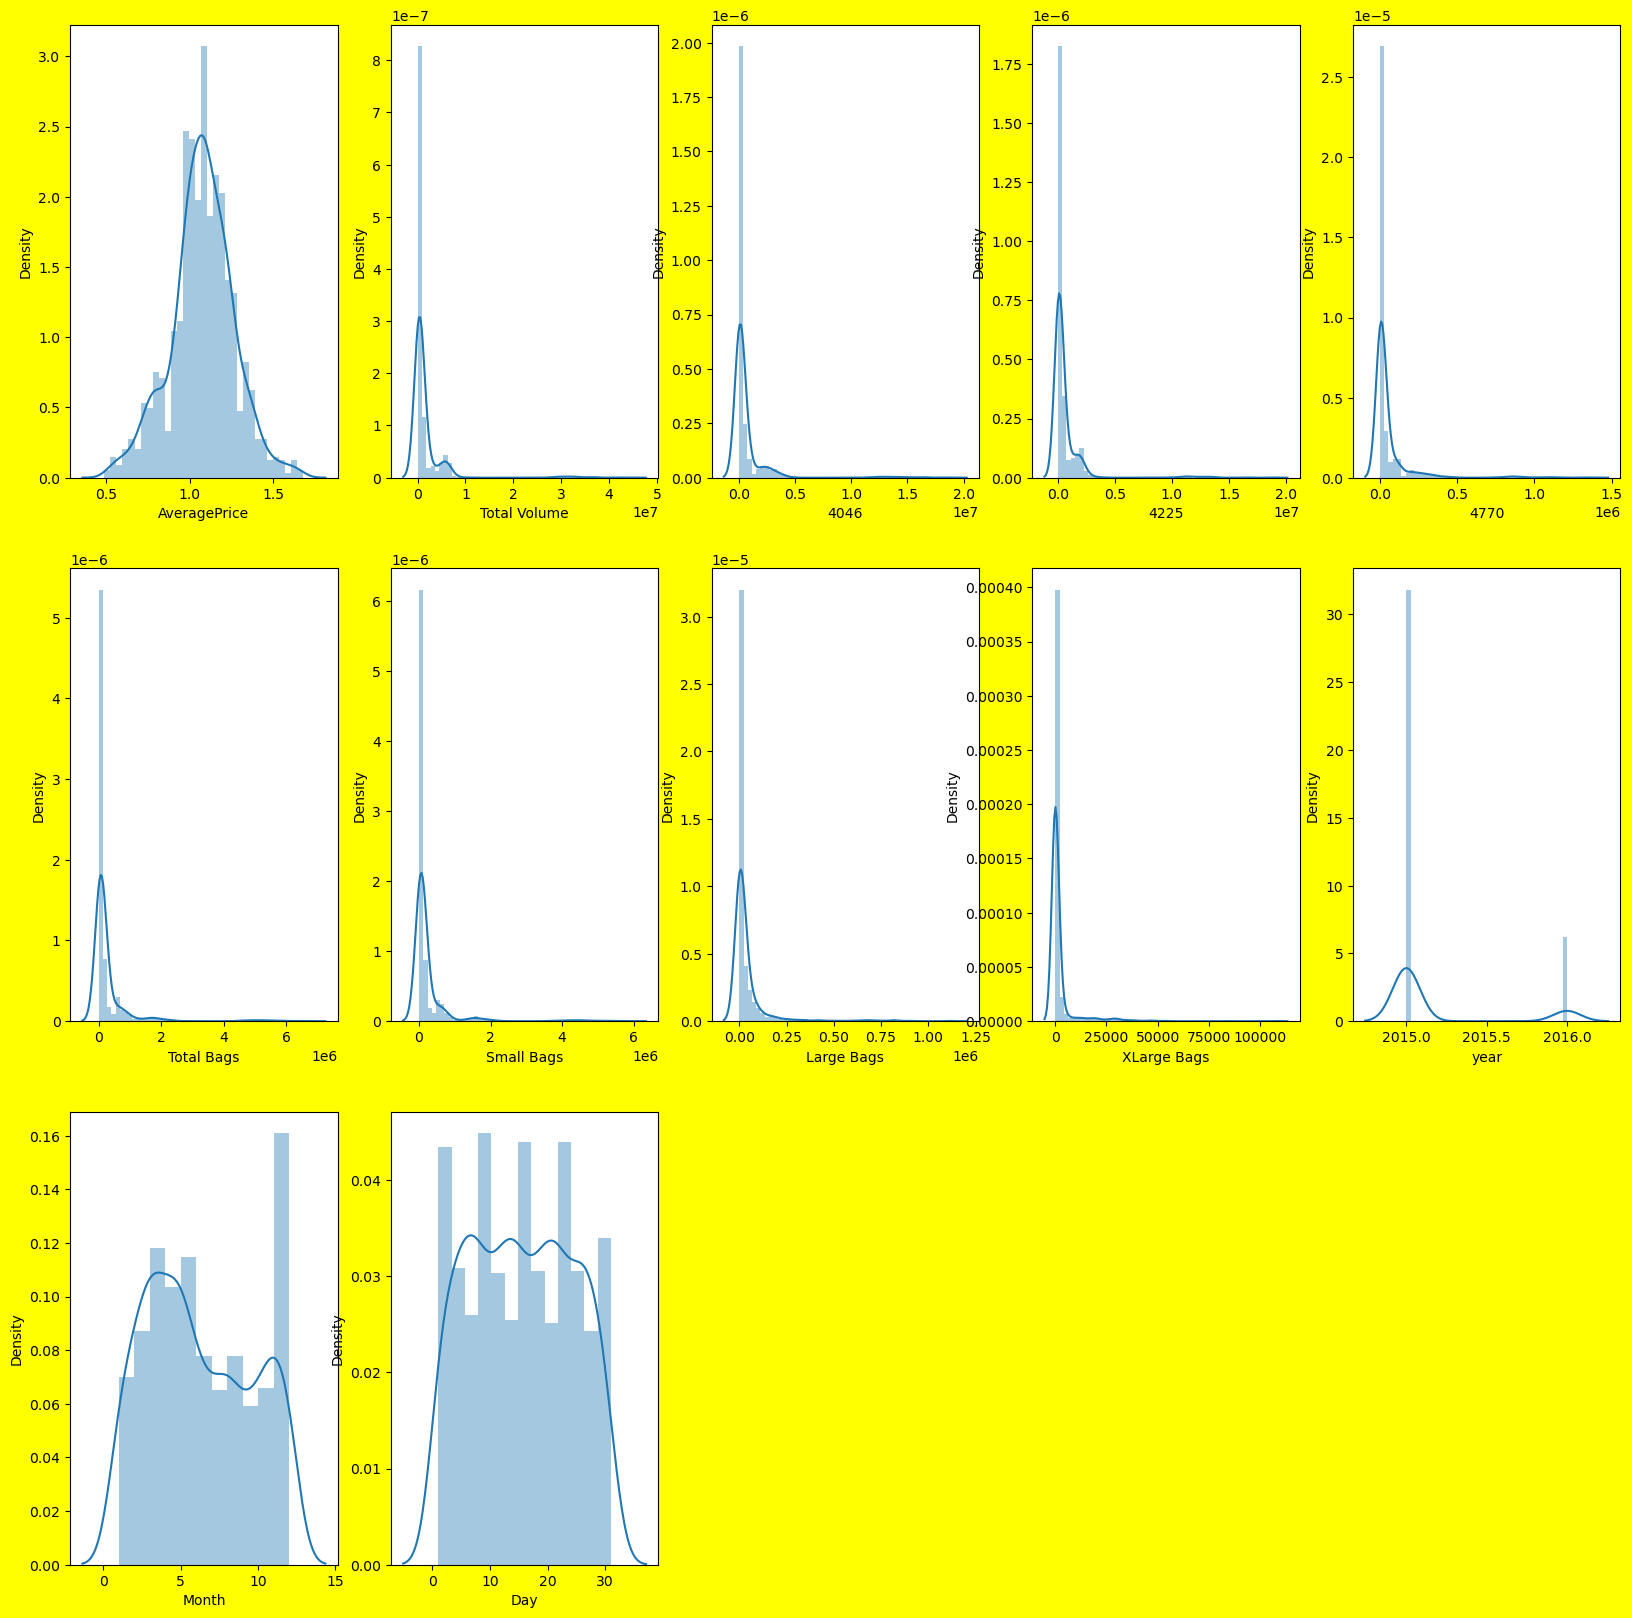

In [31]:
# After go through the dataset we assume something that skewness and outliers is there so now we analyse the data to check 
# howmuch our assumption is correct
# Here we check how data is distributed, it is normally distributed or not.

plt.figure(figsize=(20,20),facecolor='yellow')
number=1
for i in df[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags','year','Month', 'Day']]:
    if number<=12:
        ax=plt.subplot(3,5,number)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=10)
    number+=1
plt.show()                                                                                       

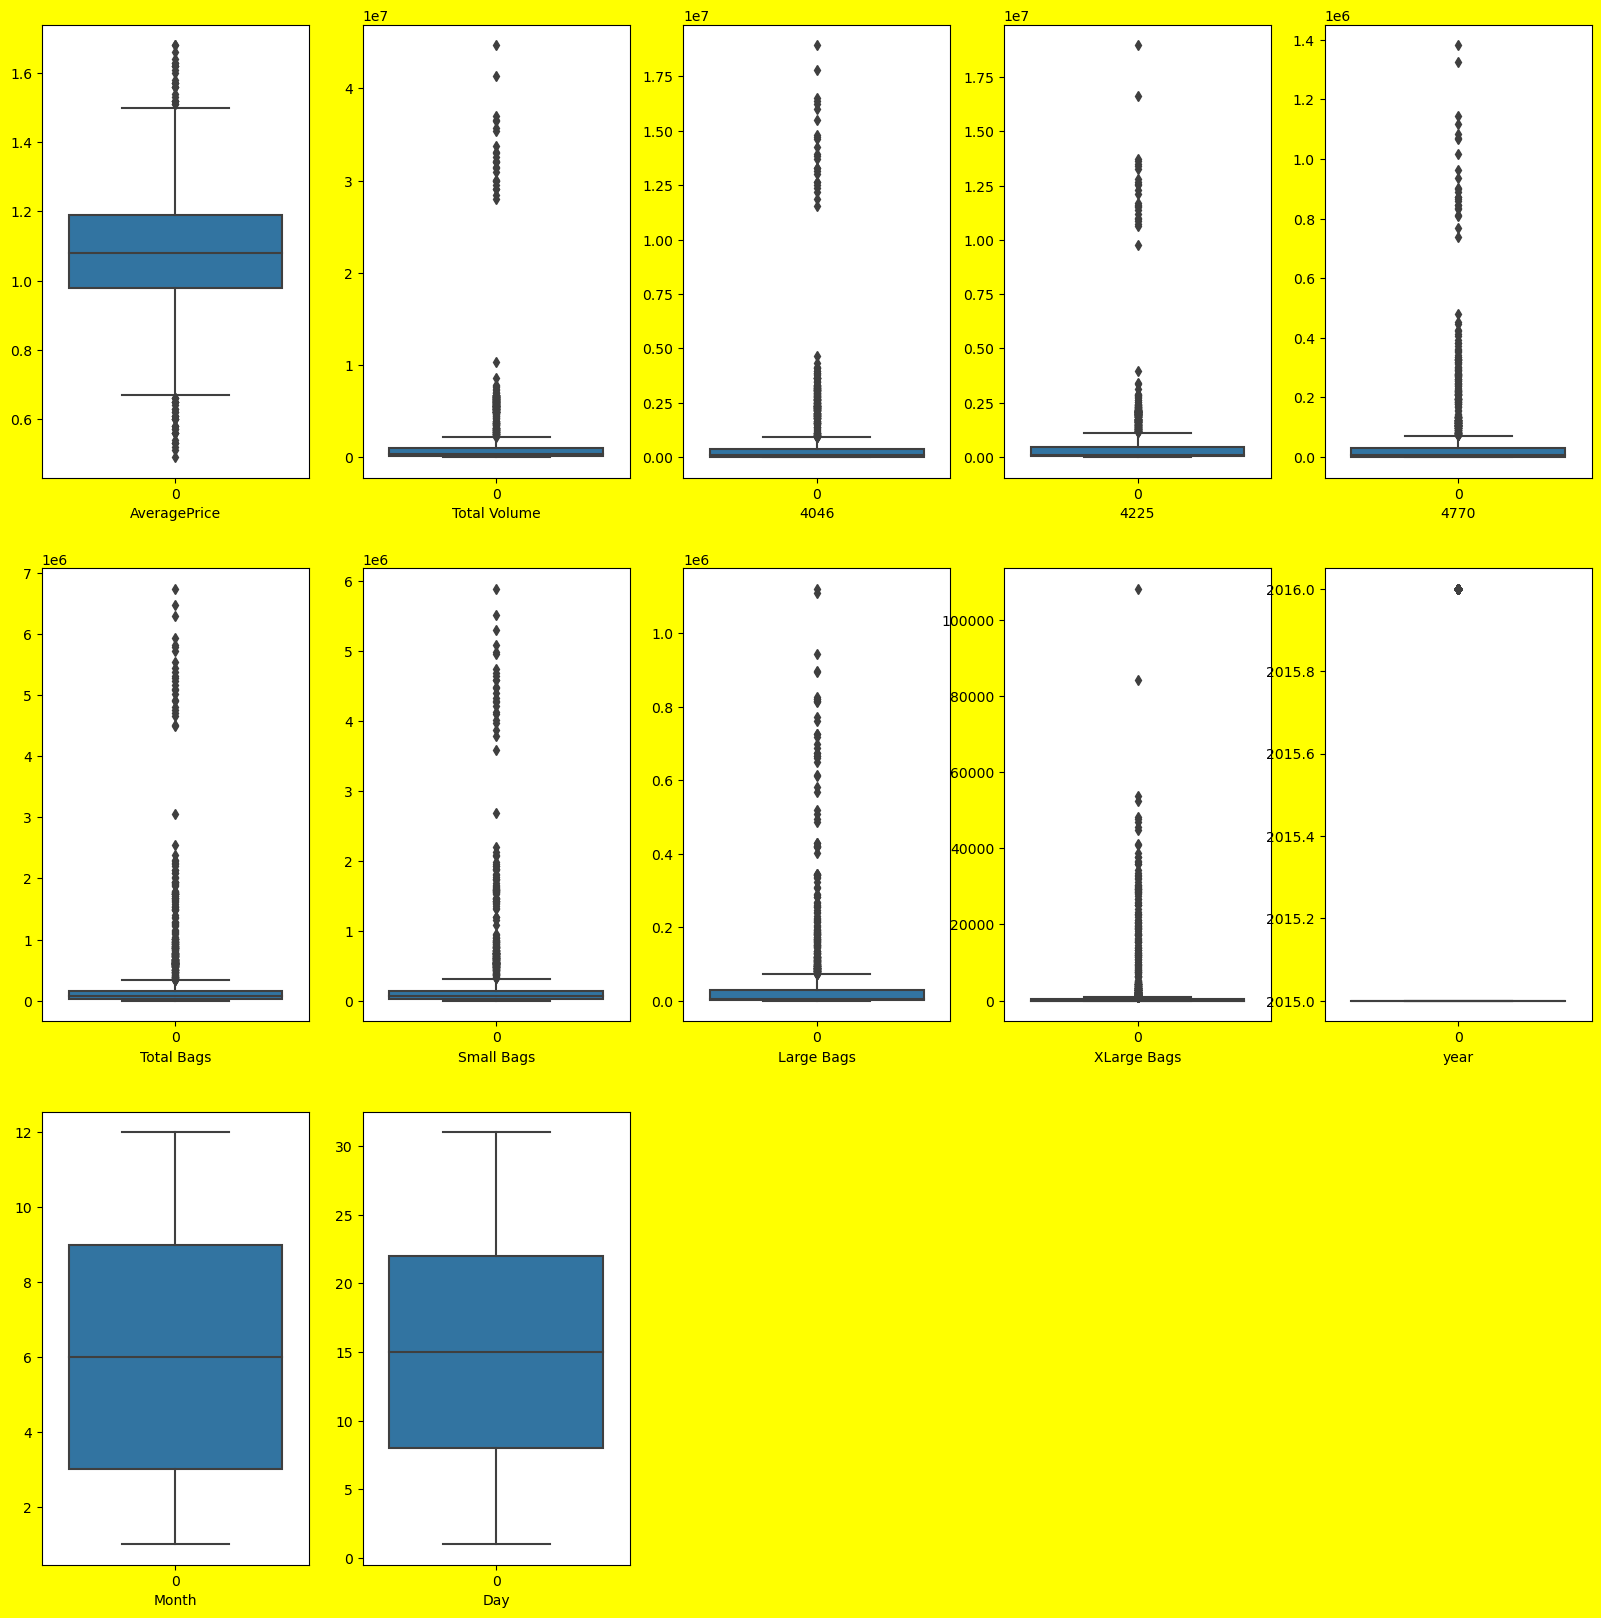

In [32]:
plt.figure(figsize=(20,20),facecolor='yellow')
number=1
for i in df[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags','year','Month', 'Day']]:
    if number<=12:
        ax=plt.subplot(3,5,number)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=10)
    number+=1
plt.show()

In [33]:
# Find the standard number of outlier and remove it

from scipy.stats import zscore

z_score=zscore(df[['Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags', 'XLarge Bags']])
data=np.abs(z_score)
filter_data=(data<3).all(axis=1)
df=df[filter_data]
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015.0,12.0,27.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015.0,12.0,20.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015.0,12.0,13.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015.0,12.0,6.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015.0,11.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016.0,10.0,16.0
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016.0,10.0,9.0
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016.0,10.0,2.0
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016.0,9.0,25.0


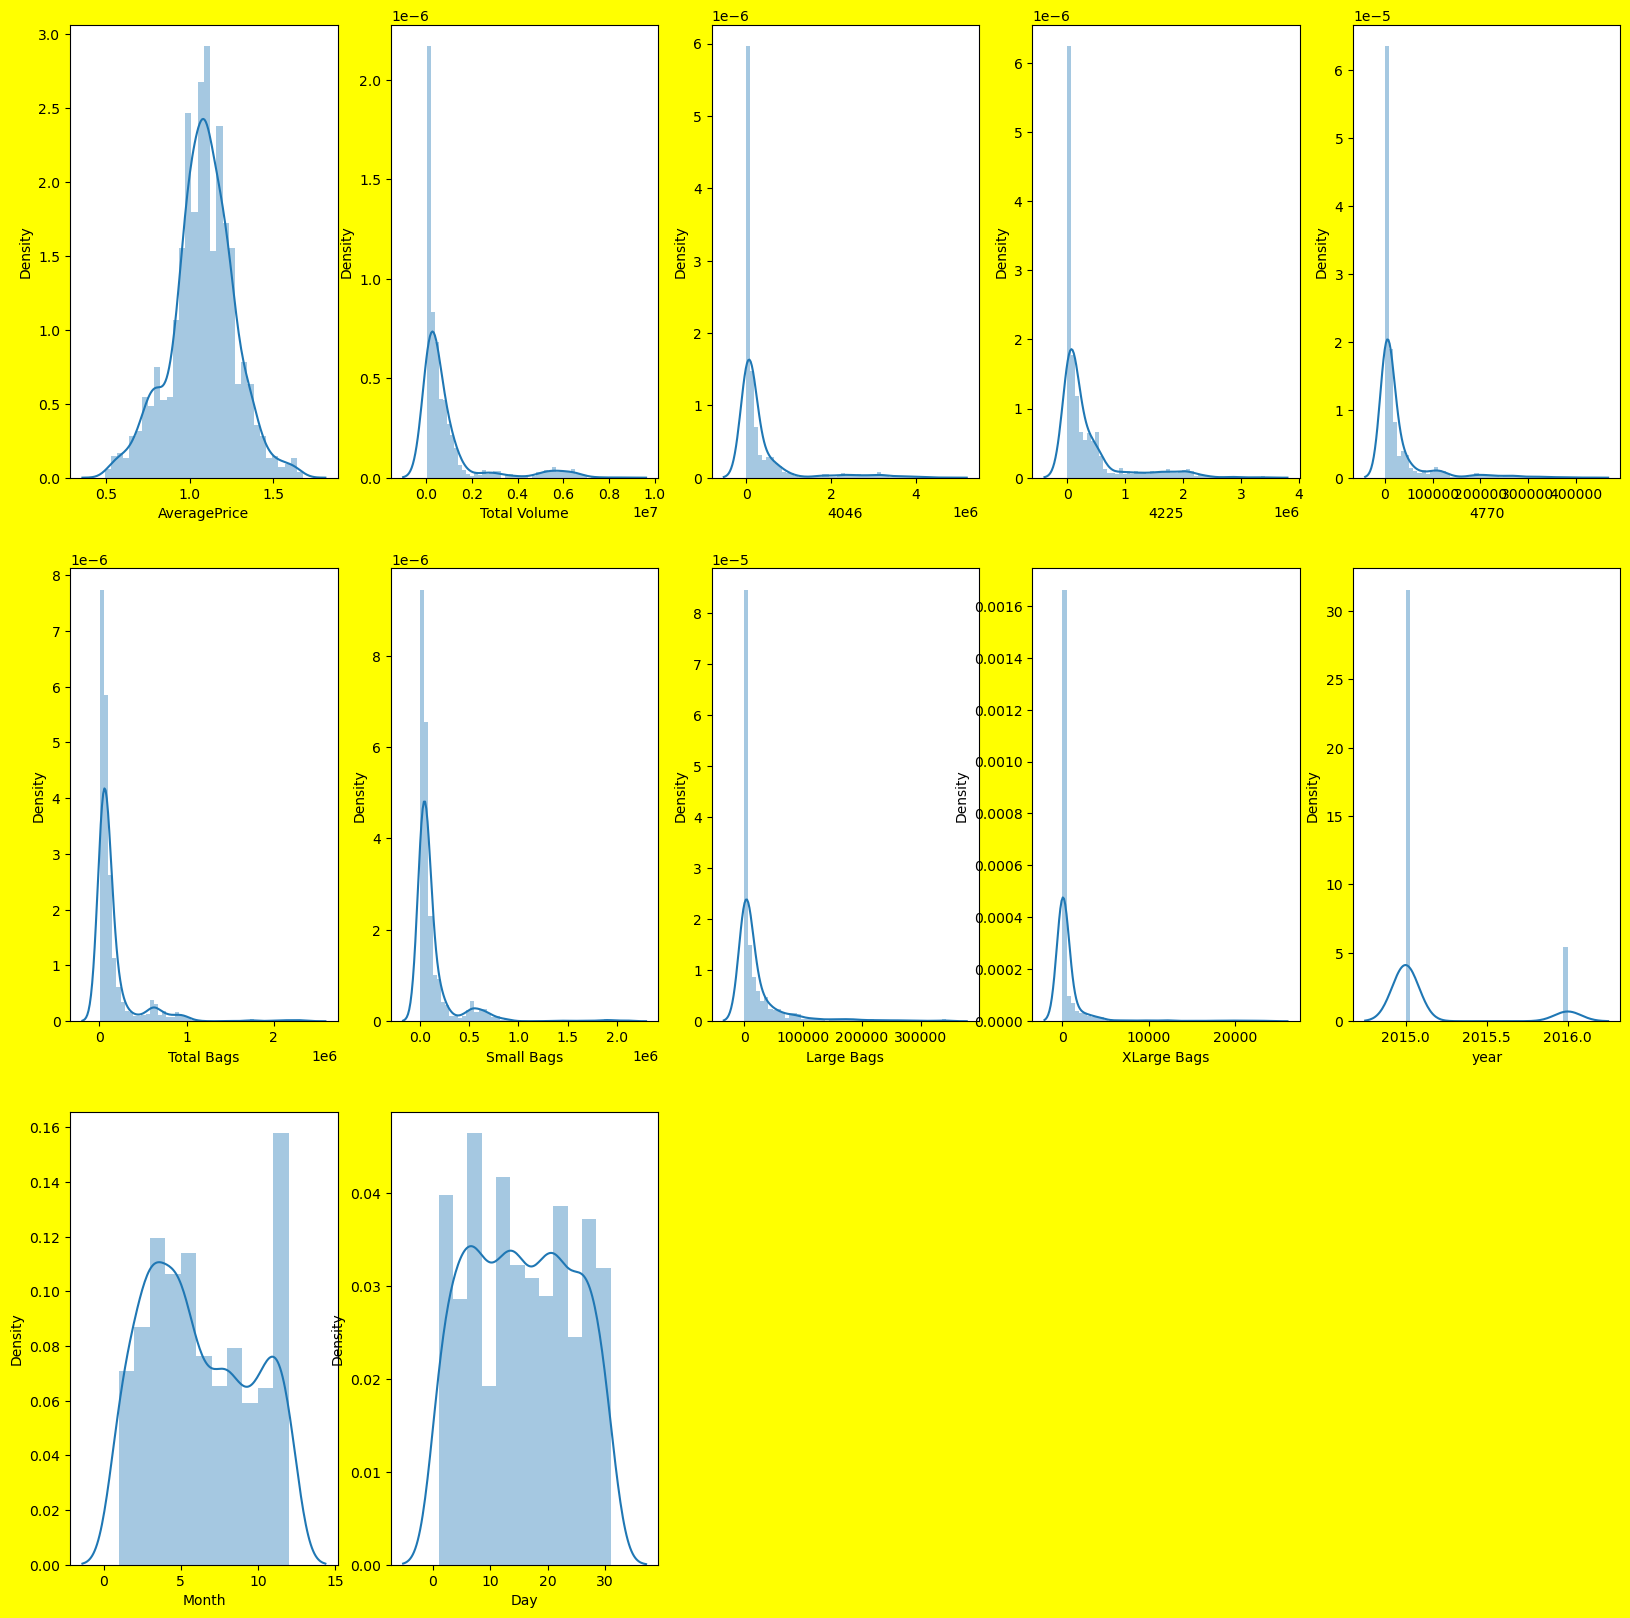

In [34]:
# Again check the distribution of data after remove the outliers

plt.figure(figsize=(20,20),facecolor='yellow')
number=1
for i in df[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags','year','Month', 'Day']]:
    if number<=12:
        ax=plt.subplot(3,5,number)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=10)
    number+=1
plt.show()      

In [35]:
df.shape

(1439, 12)

In [36]:
# Separate Input and Output Variable

x=df.drop(['AveragePrice'],axis=1)
y=df.AveragePrice

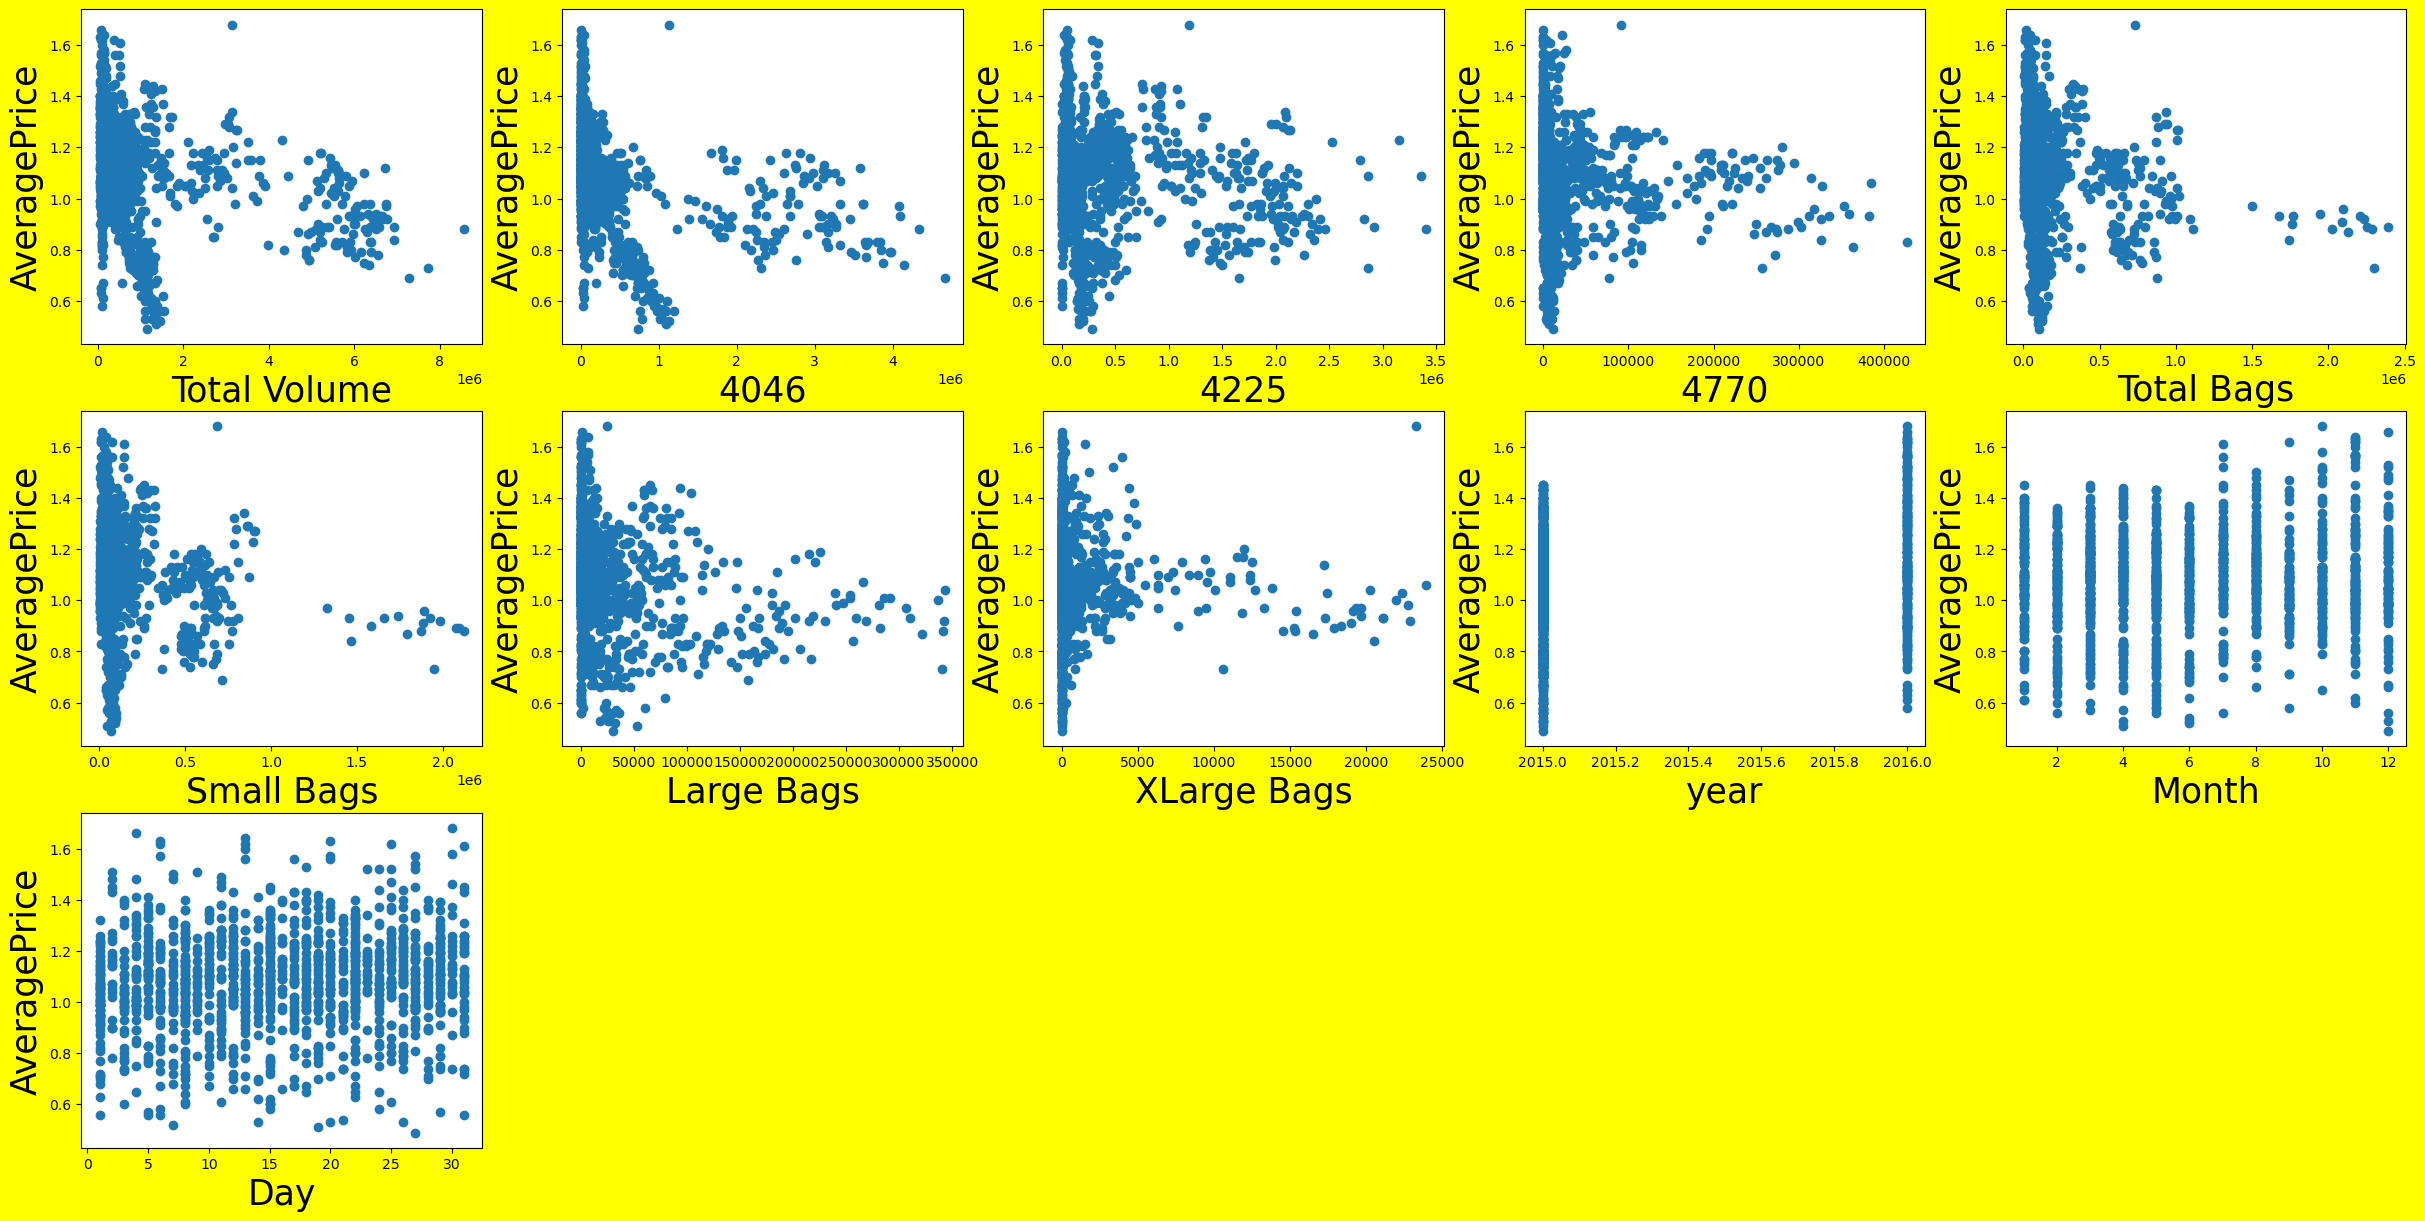

In [37]:
# Now we check the relation b/w Input and Output Variable

plt.figure(figsize=(30,20),facecolor='yellow')
number=1
for i in x:
    if number<=12:
        ax=plt.subplot(4,5,number)
        plt.scatter(x[i],y)
        plt.xlabel(i,fontsize=25)
        plt.ylabel('AveragePrice',fontsize=25)
    number+=1
plt.show()

# After go through the graph we analyse every feature has a relation with target so we can not remove any feature data on the 
# basis of assumption untill we are not sure.

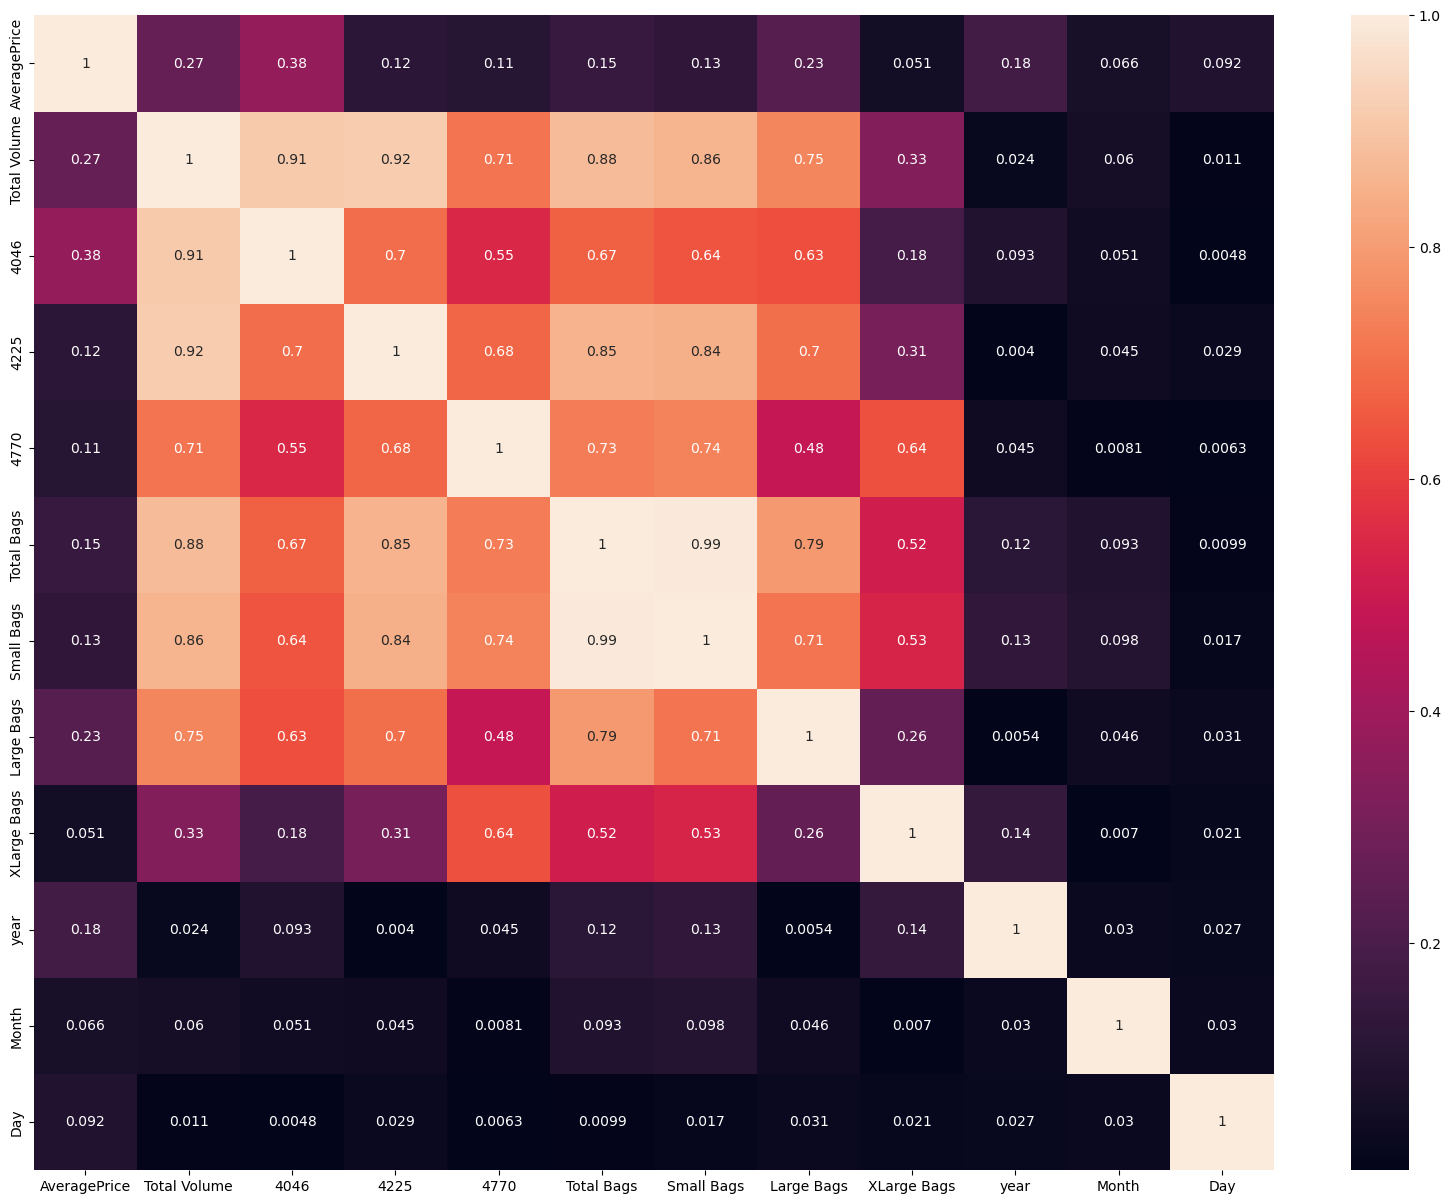

In [38]:
# Check the corelation and relationship b/w data (feature and Target)

plt.figure(figsize=(20,15))
sns.heatmap(df.corr().abs(),annot=True)
plt.show()

# In this heapmap we can see there is many feature are corelated with each other so let see what will happen

In [39]:
# Now standarised the data means take all data on one scale.

from sklearn.preprocessing import StandardScaler

x_scaler=StandardScaler()
x_scaler=x_scaler.fit_transform(x)
x_scaler

array([[-0.56453388, -0.47702473, -0.53808137, ..., -0.4156671 ,
         1.73637065,  1.30893634],
       [-0.57078784, -0.47750515, -0.55550254, ..., -0.4156671 ,
         1.73637065,  0.5137062 ],
       [-0.52846287, -0.47734554, -0.44101089, ..., -0.4156671 ,
         1.73637065, -0.28152394],
       ...,
       [-0.48824443, -0.4169448 , -0.54085261, ...,  2.40577136,
         1.14462705, -1.53117131],
       [-0.48108103, -0.40667782, -0.53960992, ...,  2.40577136,
         0.84875525,  1.08172773],
       [-0.48519251, -0.4212503 , -0.53854535, ...,  2.40577136,
         0.84875525,  0.28649759]])

In [48]:
# Split the dataset into Training and Test Data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=.20,random_state=42)

In [49]:
# As it is Regression Problem so we use Regression Models
# Linear Regression Model

from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [50]:
# Now we check how much linear Regression model understand the trained data

lin_reg.score(x_train,y_train)

0.226171395327861

In [51]:
# Now we check how much linear Regression model understand the test Data

lin_reg.score(x_test,y_test)

0.19760813742921324

In [52]:
# Now we evaluate the model using metrics that how model is performing.

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [53]:
y_pred=lin_reg.predict(x_test)
y_pred

array([1.10828113, 1.16588519, 1.10751735, 1.07126011, 1.05941284,
       1.09040424, 1.12175404, 1.08762103, 0.86576648, 1.18080556,
       0.92935406, 1.1501316 , 0.98499267, 1.10012101, 1.09103871,
       0.73676521, 1.14157305, 1.04016201, 1.01305733, 1.01840843,
       0.86462216, 0.92989318, 1.06394289, 1.05516906, 1.10123803,
       1.07608912, 1.21089778, 1.09484797, 1.04934591, 1.08281958,
       1.11806183, 1.1059769 , 1.07876094, 1.06439851, 1.06313158,
       1.1379452 , 1.07877697, 1.08396413, 0.93597686, 1.07980669,
       1.02653122, 1.12372008, 1.05714028, 1.06877672, 0.93941033,
       1.17259857, 1.03857232, 1.17348101, 1.09358542, 1.07105375,
       1.20635082, 1.13895338, 1.13126228, 0.72124051, 1.17535245,
       1.08264101, 1.08234674, 1.11526828, 1.09516163, 1.14397024,
       1.07272638, 1.04632736, 1.14734311, 1.16644221, 1.23000921,
       0.85030462, 1.13631579, 1.0901536 , 1.09167485, 1.03438243,
       0.95782943, 1.07402062, 0.97371813, 1.03556464, 1.01337

In [54]:
r1=r2_score(y_test,y_pred)
r1

0.19760813742921324

In [56]:
mae1=mean_absolute_error(y_test,y_pred)
mae1

0.1240620173867814

In [57]:
mse1=mean_squared_error(y_test,y_pred)
mse1

0.028054112092241082

In [58]:
rmse1=np.sqrt(mean_squared_error(y_test,y_pred))
rmse1

0.16749361806421487

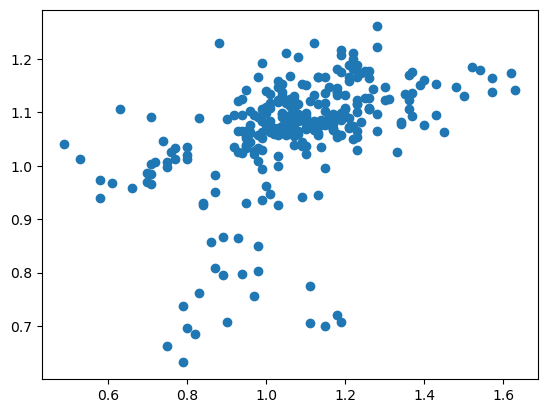

In [59]:
# RMSE is low so model can be good but we will recheck using graph

plt.scatter(x=y_test,y=y_pred)

In [ ]:
# Linear Regression Model is looking good but we are not sure that this is the best model for the data so we try some other 
# models on data.

In [62]:
# Decision Tree Regressor Model

from sklearn.tree import DecisionTreeRegressor

dectree=DecisionTreeRegressor()
dectree.fit(x_train,y_train)

DecisionTreeRegressor()

In [63]:
dectree.score(x_train,y_train)

1.0

In [64]:
dectree.score(x_test,y_test)

0.7530333227482026

In [65]:
pred1=dectree.predict(x_test)
pred1

array([1.25, 1.18, 0.97, 1.09, 1.01, 0.93, 1.09, 0.88, 0.88, 1.28, 0.97,
       1.16, 0.78, 1.08, 1.03, 0.77, 1.12, 0.67, 0.81, 0.96, 0.91, 0.88,
       1.36, 1.01, 1.03, 1.44, 1.14, 1.2 , 1.19, 1.05, 1.02, 1.23, 1.19,
       1.07, 1.05, 1.17, 1.11, 1.  , 1.15, 1.35, 0.81, 1.17, 1.04, 1.01,
       0.56, 1.26, 0.96, 1.24, 1.19, 1.09, 1.17, 1.04, 1.41, 1.16, 1.28,
       0.98, 1.2 , 1.01, 1.05, 1.28, 1.07, 0.74, 1.15, 1.27, 0.88, 0.98,
       1.34, 1.06, 1.19, 0.85, 0.66, 1.09, 0.53, 1.09, 0.67, 1.02, 1.62,
       1.07, 1.  , 0.97, 1.  , 1.15, 1.05, 0.88, 1.17, 1.46, 1.21, 1.08,
       1.33, 1.01, 0.68, 0.83, 0.83, 1.15, 1.22, 1.18, 1.19, 0.78, 0.87,
       1.35, 0.96, 1.32, 1.45, 1.02, 1.16, 1.05, 1.29, 0.74, 1.17, 0.91,
       1.04, 1.21, 0.92, 0.97, 1.04, 1.22, 1.36, 1.12, 1.38, 1.15, 1.21,
       0.8 , 1.09, 0.99, 1.05, 0.95, 0.88, 0.99, 1.05, 1.22, 0.93, 1.19,
       0.98, 0.67, 1.09, 1.24, 1.09, 1.03, 1.64, 1.32, 0.98, 1.32, 1.22,
       0.9 , 1.35, 0.97, 0.96, 0.99, 1.16, 0.93, 1.

In [66]:
r2=r2_score(y_test,pred1)
r2

0.7530333227482026

In [67]:
mae2=mean_absolute_error(y_test,pred1)
mae2

0.06506944444444444

In [68]:
mse2=mean_squared_error(y_test,pred1)
mse2

0.00863472222222222

In [69]:
rmse2=np.sqrt(mean_squared_error(y_test,pred1))
rmse2

0.09292320604790937

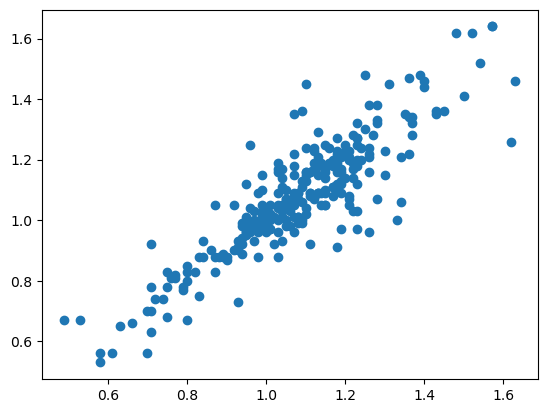

In [71]:
# RMSE is low so model can be good but we will recheck using graph

plt.scatter(x=y_test,y=pred1)

In [ ]:
# Through this graph we can say Decision tree is better than Linear Regression

# But we will try some other models may be that model can performn more better.

In [72]:
# AdaBoost Regressor Model

from sklearn.ensemble import AdaBoostRegressor

In [73]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [74]:
pred2=ada.predict(x_test)
pred2

array([1.18054054, 1.0250495 , 1.16403553, 1.05782051, 1.07666667,
       1.01199115, 1.17458333, 0.95846939, 0.95846939, 1.16477504,
       0.81064516, 1.13369888, 0.79653061, 1.02683333, 1.10176471,
       0.8922541 , 1.14658046, 0.78333333, 0.80768212, 1.08812623,
       0.98256966, 0.94821429, 1.22      , 1.04469388, 1.17715217,
       1.17715217, 1.20030744, 1.16477504, 1.21152284, 1.13108861,
       1.14469325, 1.18054054, 1.13424547, 1.09651163, 1.10356546,
       1.11288262, 1.17715217, 1.13369888, 0.99782609, 1.17315508,
       0.8090393 , 1.06      , 1.14326531, 1.10356546, 0.77089286,
       1.29922581, 1.04009901, 1.14469325, 1.12962418, 1.1287055 ,
       1.14001984, 1.02291139, 1.37577855, 0.9643662 , 1.17315508,
       1.1287055 , 1.17715217, 1.04469388, 1.0524026 , 1.14001984,
       1.11288262, 0.81064516, 1.30992908, 1.14001984, 0.95846939,
       1.0125641 , 1.16172414, 1.17315508, 1.02683333, 0.79653061,
       0.78333333, 1.09655738, 0.76543307, 1.08812623, 0.78333

In [75]:
r3=r2_score(y_test,pred2)
r3

0.6537761869439825

In [76]:
mae3=mean_absolute_error(y_test,pred2)
mae3

0.0886517083269218

In [77]:
mse3=mean_squared_error(y_test,pred2)
mse3

0.012105060025605328

In [78]:
rmse3=np.sqrt(mean_squared_error(y_test,pred2))
rmse3

0.11002299771232071

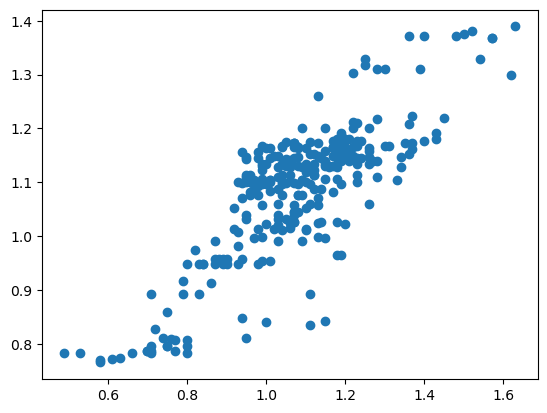

In [80]:
# RMSE is low but it is not better than DT ,but we will recheck using graph

plt.scatter(x=y_test,y=pred2)

In [82]:
# Good but DT is better than AdaBoost
# We will try some other model

In [83]:
# Random Forest Regression Model

from sklearn.ensemble import RandomForestRegressor
ran_forst=RandomForestRegressor()
ran_forst.fit(x_train,y_train)

RandomForestRegressor()

In [84]:
pred3=ran_forst.predict(x_test)
pred3

array([1.1889, 1.1244, 1.0587, 1.0414, 1.0351, 1.0059, 1.1415, 0.911 ,
       0.8534, 1.1886, 0.9001, 1.172 , 0.7638, 1.0613, 1.0369, 0.858 ,
       1.0652, 0.6604, 0.779 , 1.0059, 0.9277, 0.8715, 1.3362, 1.0101,
       1.1549, 1.3022, 1.196 , 1.1689, 1.2382, 1.024 , 1.0155, 1.1911,
       1.1352, 1.0661, 1.0572, 1.0417, 1.1407, 0.9997, 0.9831, 1.1642,
       0.7759, 1.0461, 1.1058, 1.0192, 0.6165, 1.3548, 1.0172, 1.2162,
       1.1175, 1.09  , 1.1897, 1.0559, 1.3872, 1.0542, 1.3201, 1.0405,
       1.2017, 1.0394, 1.0674, 1.2195, 1.0672, 0.7515, 1.261 , 1.2057,
       0.9687, 1.0431, 1.2399, 1.0966, 1.1118, 0.8033, 0.6762, 1.0619,
       0.5601, 1.0914, 0.6991, 1.0418, 1.5296, 1.0887, 1.0355, 0.9793,
       1.037 , 1.0967, 1.0481, 0.9924, 1.1409, 1.5343, 1.1976, 1.0915,
       1.1482, 1.1459, 0.7262, 0.8599, 0.8585, 1.126 , 1.1871, 1.107 ,
       1.145 , 0.746 , 0.8454, 1.3598, 1.0436, 1.3268, 1.1928, 1.0293,
       1.0284, 1.052 , 1.2035, 0.7654, 1.17  , 1.1135, 1.0377, 1.1709,
      

In [85]:
r4=r2_score(y_test,pred3)
r4

0.8384410357051095

In [86]:
mae4=mean_absolute_error(y_test,pred3)
mae4

0.056165277777777786

In [87]:
mse4=mean_squared_error(y_test,pred3)
mse4

0.005648603263888889

In [88]:
rmse4=np.sqrt(mean_squared_error(y_test,pred3))
rmse4

0.07515719036718237

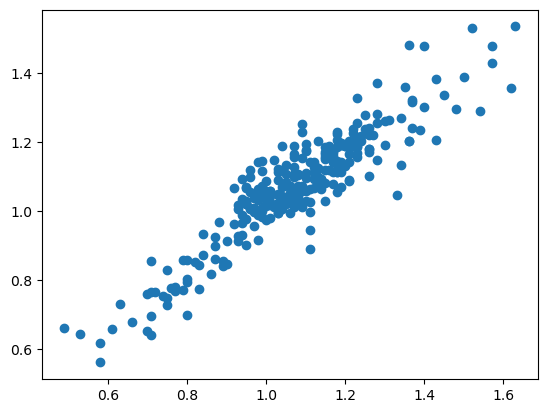

In [89]:
# RMSE is low so model can be good but we will recheck using graph

plt.scatter(x=y_test,y=pred3)

In [ ]:
# Through this graph we can say Random Forest Model is better than DT Model

# But we will try some other models may be that model can performn more better.

In [90]:
# KNN Regressor Model

from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [91]:
pred4=knn.predict(x_test)
pred4

array([1.296, 1.086, 1.226, 1.15 , 1.11 , 0.974, 0.884, 0.932, 0.896,
       1.25 , 0.98 , 1.168, 0.748, 1.074, 1.116, 0.912, 1.068, 0.878,
       0.7  , 1.014, 0.97 , 0.912, 1.186, 1.104, 1.102, 1.1  , 1.186,
       1.122, 1.114, 1.036, 1.27 , 1.152, 1.026, 1.154, 1.094, 1.068,
       1.238, 1.01 , 1.018, 1.126, 0.756, 1.028, 1.078, 1.188, 0.728,
       1.38 , 1.086, 1.212, 1.126, 0.936, 1.22 , 1.076, 1.118, 1.038,
       1.214, 1.116, 1.278, 1.05 , 0.996, 1.194, 1.21 , 0.74 , 1.336,
       1.192, 0.906, 1.096, 1.334, 1.23 , 1.078, 0.918, 0.804, 1.05 ,
       0.692, 1.122, 0.712, 0.984, 1.35 , 1.21 , 1.088, 0.982, 1.076,
       1.094, 1.078, 1.018, 1.078, 1.334, 1.156, 1.138, 1.144, 1.146,
       0.738, 0.874, 0.834, 1.122, 1.24 , 1.126, 1.18 , 0.73 , 0.844,
       1.176, 1.116, 1.21 , 1.056, 1.082, 1.062, 1.06 , 0.976, 0.9  ,
       1.144, 1.154, 1.054, 1.16 , 1.026, 1.054, 1.118, 0.954, 1.09 ,
       1.182, 1.162, 1.134, 1.2  , 0.77 , 1.138, 1.138, 1.028, 1.134,
       0.976, 1.13 ,

In [92]:
r5=r2_score(y_test,pred4)
r5

0.6281270556392478

In [93]:
mae5=mean_absolute_error(y_test,pred4)
mae5

0.08309722222222221

In [94]:
mse5=mean_squared_error(y_test,pred4)
mse5

0.013001833333333334

In [95]:
rmse5=np.sqrt(mean_squared_error(y_test,pred4))
rmse5

0.1140255819249932

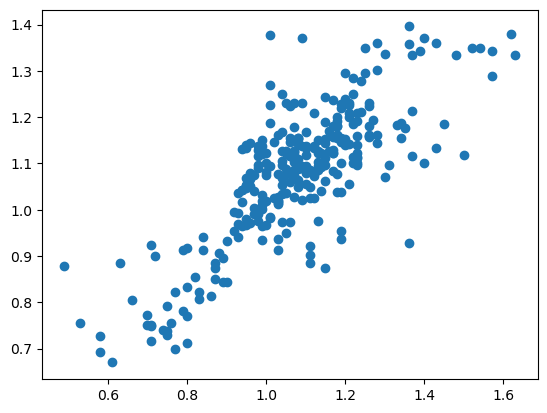

In [97]:
# RMSE is low so model can be good but we will recheck using graph

plt.scatter(x=y_test,y=pred4)

In [ ]:
# Through this graph we can say this model is good but not better than Random Forest Model

# But we will try some other models may be that model can performn more better.

In [98]:
# Gradient Boosting Regressor Model

from sklearn.ensemble import GradientBoostingRegressor
gbdt=GradientBoostingRegressor()
gbdt.fit(x_train,y_train)

GradientBoostingRegressor()

In [99]:
pred5=gbdt.predict(x_test)
pred5

array([1.17571081, 1.07547041, 1.10290061, 1.00870452, 0.96924791,
       0.98151598, 1.11183719, 0.97048812, 0.9179079 , 1.18969035,
       0.75861354, 1.17299618, 0.71985099, 1.01974363, 1.03529642,
       0.94185415, 1.13253858, 0.64753814, 0.77487981, 1.04454184,
       0.94821682, 0.92911616, 1.34772648, 0.99879423, 1.18579671,
       1.21065084, 1.21919608, 1.16095205, 1.28786519, 1.05359261,
       1.05156265, 1.16795347, 1.08143144, 1.04457012, 1.01055958,
       1.07213712, 1.17875623, 1.05658099, 0.91206775, 1.16144567,
       0.78955206, 1.04626323, 1.13002053, 1.05368684, 0.59874119,
       1.26442625, 0.97825055, 1.16977868, 1.10484327, 1.12263555,
       1.15850607, 0.99442467, 1.31924083, 0.94335106, 1.34634608,
       1.06932652, 1.16390391, 1.03743213, 1.00286178, 1.17328375,
       1.04656077, 0.78369358, 1.23672084, 1.16338218, 1.00146179,
       1.05045933, 1.20558404, 1.14707105, 1.04967813, 0.80691153,
       0.70397723, 1.10185882, 0.6221283 , 1.10919238, 0.74570

In [100]:
r6=r2_score(y_test,pred5)
r6

0.7443528672488458

In [101]:
mae6=mean_absolute_error(y_test,pred5)
mae6

0.07148699355887514

In [102]:
mse6=mean_squared_error(y_test,pred5)
mse6

0.008938217911735373

In [103]:
rmse6=np.sqrt(mean_squared_error(y_test,pred5))
rmse6

0.09454214886353797

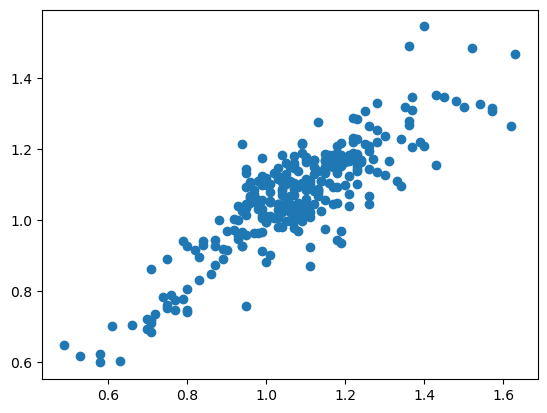

In [104]:
# RMSE is low so model can be good but we will recheck using graph

plt.scatter(x=y_test,y=pred5)

In [105]:
# Through this graph we can say this model is good but not better than Random Forest Model

# But we will try some other models may be that model can performn more better.

In [106]:
# SVR Model

from sklearn.svm import SVR
svr=SVR()  
svr.fit(x_train,y_train)

SVR()

In [107]:
pred6=svr.predict(x_test)
pred6

array([1.26785808, 1.08413612, 1.11025945, 1.01479043, 1.10326923,
       0.99195079, 1.06870852, 1.00681028, 0.91778365, 1.15562369,
       0.89916805, 1.17526419, 0.8506965 , 0.98879549, 1.12276193,
       0.82958982, 1.09465204, 0.67250818, 0.82571135, 1.04533243,
       0.90320796, 0.88056999, 1.18739145, 1.08718703, 1.15225773,
       1.24720207, 1.20744996, 1.22301624, 1.11485915, 1.01616742,
       1.12752064, 1.17474864, 1.1431947 , 1.14145903, 1.10472406,
       1.08522391, 1.19722536, 1.03216821, 1.02990341, 1.16584391,
       0.82803744, 1.0452041 , 1.12270746, 1.05136152, 0.61862629,
       1.39633868, 0.98218184, 1.14011024, 1.14950391, 1.09439733,
       1.3094994 , 1.04675362, 1.21922899, 1.072671  , 1.25082908,
       1.11410012, 1.2394313 , 1.03467311, 0.99277899, 1.2335436 ,
       1.14434553, 0.87833935, 1.26847139, 1.16828722, 0.99129468,
       1.05632124, 1.32954149, 1.18612619, 1.04176159, 0.93748218,
       0.71615428, 1.02211821, 0.60960109, 1.00903838, 0.74518

In [108]:
r7=r2_score(y_test,pred6)
r7

0.6830347958705938

In [109]:
mae7=mean_absolute_error(y_test,pred6)
mae7

0.08318054598096168

In [110]:
mse7=mean_squared_error(y_test,pred6)
mse7

0.011082088167615198

In [111]:
rmse7=np.sqrt(mean_squared_error(y_test,pred6))
rmse7

0.10527149741318967

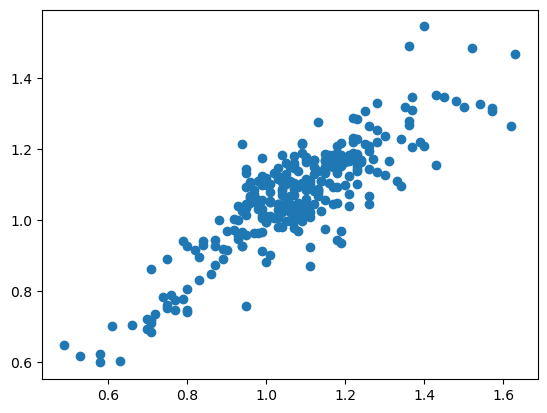

In [112]:
# RMSE is low so model can be good but we will recheck using graph

plt.scatter(x=y_test,y=pred5)

In [114]:
# Through this graph we can say this model is good but not better than Random Forest Model

In [113]:
# Cross_Validation:

from sklearn.model_selection import cross_val_score


In [121]:
lnr_reg=cross_val_score(lin_reg,x_scaler,y,cv=3).mean()
lnr_reg

-1.967904752670719e+25

In [122]:
dec_tr=cross_val_score(dectree,x_scaler,y,cv=5).mean()
dec_tr

-0.5824873700881644

In [123]:
ada_reg=cross_val_score(ada,x_scaler,y,cv=5).mean()
ada_reg

0.24589271452334796

In [124]:
ran_reg=cross_val_score(ran_forst,x_scaler,y,cv=5).mean()
ran_reg

0.22807341013909369

In [125]:
knn_reg=cross_val_score(knn,x_scaler,y,cv=5).mean()
knn_reg

0.12765843128478965

In [127]:
gbdt_reg=cross_val_score(gbdt,x_scaler,y,cv=5).mean()
gbdt_reg

0.24642737304273007

In [128]:
svr_reg=cross_val_score(svr,x_scaler,y,cv=5).mean()
svr_reg

0.25072314013442176

In [129]:
models = pd.DataFrame({'Model': ['Linear_Regression','Decision Tree','AdaBoost','Random_Forest','KNN_Model','GBDT',
                                 'Support Vector Machines'],
                       'R2 Score Result':[r1,r2,r3,r4,r5,r6,r7],'MAE Result':[mae1,mae2,mae3,mae4,mae5,mae6,mae7],
                       'MSE Result':[mse1,mse2,mse3,mse4,mse5,mse6,mse7],'RMSE Result':[rmse1,rmse2,rmse3,rmse4,rmse5,
                                                                                        rmse6,rmse7],
                       'Cross Validation Score':[lnr_reg,dec_tr,ada_reg,ran_reg,knn_reg,gbdt_reg,svr_reg]})
models

,Model,R2 Score Result,MAE Result,MSE Result,RMSE Result,Cross Validation Score
0,Linear_Regression,0.197608,0.124062,0.028054,0.167494,-1.967905e+25
1,Decision Tree,0.753033,0.065069,0.008635,0.092923,-5.824874e-01
2,AdaBoost,0.653776,0.088652,0.012105,0.110023,2.458927e-01
3,Random_Forest,0.838441,0.056165,0.005649,0.075157,2.280734e-01
4,KNN_Model,0.628127,0.083097,0.013002,0.114026,1.276584e-01
5,GBDT,0.744353,0.071487,0.008938,0.094542,2.464274e-01
6,Support Vector Machines,0.683035,0.083181,0.011082,0.105271,2.507231e-01


In [133]:
# In above DataFrame we can see Random Forest Model is Performing better than other models

In [134]:
# Hyperparameter Tunnning for Random forest Model

In [160]:
params={'n_estimators':[4,5],'max_depth':[10,15],'min_samples_leaf':[5,6],
        'min_samples_split':[10,11]}

In [161]:
from sklearn.model_selection import GridSearchCV

In [162]:
grid_search= GridSearchCV(ran_forst,param_grid=params,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [4, 5]})

In [163]:
grid_search.best_params_

{'max_depth': 15,
 'min_samples_leaf': 6,
 'min_samples_split': 11,
 'n_estimators': 5}

In [164]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=15, min_samples_leaf=6, min_samples_split=11,
                      n_estimators=5)

In [166]:
# Final Model

final_model=RandomForestRegressor(max_depth=15, min_samples_leaf=6, min_samples_split=11,n_estimators=5)
final_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=6, min_samples_split=11,
                      n_estimators=5)

In [167]:
predd=final_model.predict(x_test)
predd

array([1.20054545, 1.10686667, 1.0887619 , 1.0312669 , 1.01348662,
       1.02815171, 1.17821849, 0.89337179, 0.83867396, 1.21077619,
       0.85223831, 1.19361499, 0.76240556, 1.02167499, 1.07624589,
       0.88027778, 1.15313333, 0.69936515, 0.76184957, 0.98256291,
       0.93361905, 0.9783278 , 1.33481667, 1.02113107, 1.1995768 ,
       1.27347042, 1.2178521 , 1.15167939, 1.30796667, 0.98414487,
       1.10697576, 1.0671428 , 1.10374643, 1.0417381 , 1.08858889,
       1.06971165, 1.13317949, 1.00245   , 0.97812393, 1.16563516,
       0.76680615, 1.00384615, 1.14990476, 1.01474487, 0.61727273,
       1.27717446, 1.03822523, 1.23379832, 1.1114906 , 1.08174687,
       1.22463209, 1.0636746 , 1.41854444, 0.98784615, 1.30923077,
       1.04435238, 1.20768026, 1.1026    , 1.13669167, 1.11449199,
       1.08747071, 0.74615   , 1.29110303, 1.22179747, 1.04966667,
       1.06823443, 1.12826263, 1.14937949, 1.08145266, 0.7725451 ,
       0.66221131, 1.076965  , 0.55412169, 1.07292753, 0.69936

In [168]:
r2_score(y_test,predd)

0.7755271813323862

In [169]:
mean_absolute_error(y_test,predd)

0.06723948887519277

In [170]:
mean_squared_error(y_test,predd)

0.007848267050448795

In [171]:
np.sqrt(mean_squared_error(y_test,predd))

0.08859044559346564

In [ ]:
# END OF THE PROJECT

In [95]:
# SOLVE THE CLASSIFICATION PROBLEM

# Import the necessary Liabrary from the system

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [96]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [97]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
df.shape

(16468, 14)

In [99]:
df.size

230552

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


In [101]:
# Drop Unnamed column

df.drop('Unnamed: 0',axis=1,inplace=True)

In [102]:
# Convert the Date column object datatype into Datetime and create month and day column.

df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12.0,27.0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12.0,20.0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12.0,13.0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,12.0,6.0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
# Now we can remove date column

df.drop('Date',axis=1,inplace=True)

In [104]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12.0,27.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12.0,20.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12.0,13.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,12.0,6.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1517 non-null   float64
 1   Total Volume  1517 non-null   float64
 2   4046          1517 non-null   float64
 3   4225          1517 non-null   float64
 4   4770          1517 non-null   float64
 5   Total Bags    1517 non-null   float64
 6   Small Bags    1517 non-null   float64
 7   Large Bags    1517 non-null   float64
 8   XLarge Bags   1517 non-null   float64
 9   type          1517 non-null   object 
 10  year          1517 non-null   float64
 11  region        1517 non-null   object 
 12  Month         1517 non-null   float64
 13  Day           1517 non-null   float64
dtypes: float64(12), object(2)
memory usage: 1.8+ MB


In [106]:
df.isnull().sum()

AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
Month           14951
Day             14951
dtype: int64

In [107]:
df.dropna(inplace=True)

In [108]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

In [109]:
# It will show the list of unique element containing by each column

for i in df:
    print(df[i].unique())

[1.33 1.35 0.93 1.08 1.28 1.26 0.99 0.98 1.02 1.07 1.12 1.31 1.11 1.34
 1.45 1.05 1.37 1.27 1.32 1.23 1.19 1.43 1.2  1.22 1.13 1.16 1.06 1.17
 1.24 0.96 1.   1.09 0.95 0.97 1.15 1.01 1.14 1.1  1.04 1.18 1.29 1.25
 1.03 1.39 1.4  1.36 1.3  0.88 1.21 0.9  0.94 0.75 0.77 0.81 0.8  0.72
 0.79 0.67 0.82 0.68 0.76 0.91 1.38 0.92 0.78 0.74 0.62 0.83 0.87 0.73
 0.7  0.89 0.85 1.44 1.42 1.41 0.49 0.53 0.66 0.56 0.6  0.71 0.65 0.58
 0.54 0.52 0.51 0.57 0.63 0.64 0.61 0.84 0.86 0.69 1.52 1.53 1.49 1.48
 1.56 1.62 1.63 1.46 1.51 1.61 1.47 1.66 1.57 1.6  1.5  1.68 1.54 1.64
 1.58]
[ 64236.62  54876.98 118220.22 ... 178410.82 189131.52 182978.3 ]
[ 1036.74   674.28   794.7  ... 46364.75 54110.79 43116.41]
[ 54454.85  44638.81 109149.67 ...  52893.38  53593.58  54193.42]
[   48.16    58.33   130.5  ... 16736.92 17495.42 16563.91]
[ 8696.87  9505.56  8145.35 ... 62415.77 63931.73 69104.56]
[ 8603.62  9408.07  8042.21 ... 53332.61 55653.47 57456.21]
[   93.25    97.49   103.14 ...  8258.16  8278.26 116

In [110]:
df.nunique()

AveragePrice     113
Total Volume    1517
4046            1517
4225            1517
4770            1516
Total Bags      1517
Small Bags      1517
Large Bags      1377
XLarge Bags      711
type               1
year               2
region            51
Month             12
Day               31
dtype: int64

In [111]:
for i in df:
    print(df[i].value_counts())

AveragePrice
1.08    46
0.99    44
1.03    44
1.10    43
1.09    43
        ..
0.51     1
0.52     1
0.54     1
1.42     1
1.58     1
Name: count, Length: 113, dtype: int64
Total Volume
64236.62      1
332918.70     1
4565207.85    1
4831664.77    1
309024.22     1
             ..
141875.20     1
92599.79      1
98097.37      1
162559.72     1
182978.30     1
Name: count, Length: 1517, dtype: int64
4046
1036.74       1
193228.98     1
2166801.03    1
2295315.43    1
180977.06     1
             ..
93556.40      1
57713.02      1
61125.82      1
110439.42     1
43116.41      1
Name: count, Length: 1517, dtype: int64
4225
54454.85      1
45809.76      1
1226508.86    1
1290847.05    1
46253.49      1
             ..
12101.67      1
9666.15       1
8956.16       1
11892.01      1
54193.42      1
Name: count, Length: 1517, dtype: int64
4770
57.68        2
48.16        1
271514.98    1
392846.12    1
12923.45     1
            ..
834.92       1
796.53       1
995.43       1
411.40       1
1

In [112]:
df.duplicated().sum()

0

In [113]:
# Here we can see type column has only one category so we will remove type column

df['type'].nunique()

1

In [114]:
df.drop(['type'],axis=1,inplace=True)

In [115]:
df.shape

(1517, 13)

In [116]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.166777,15.449572
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,3.391243,8.796714
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,6.000000,15.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,9.000000,22.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000,31.000000


In [117]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'region', 'Month',
       'Day'],
      dtype='object')

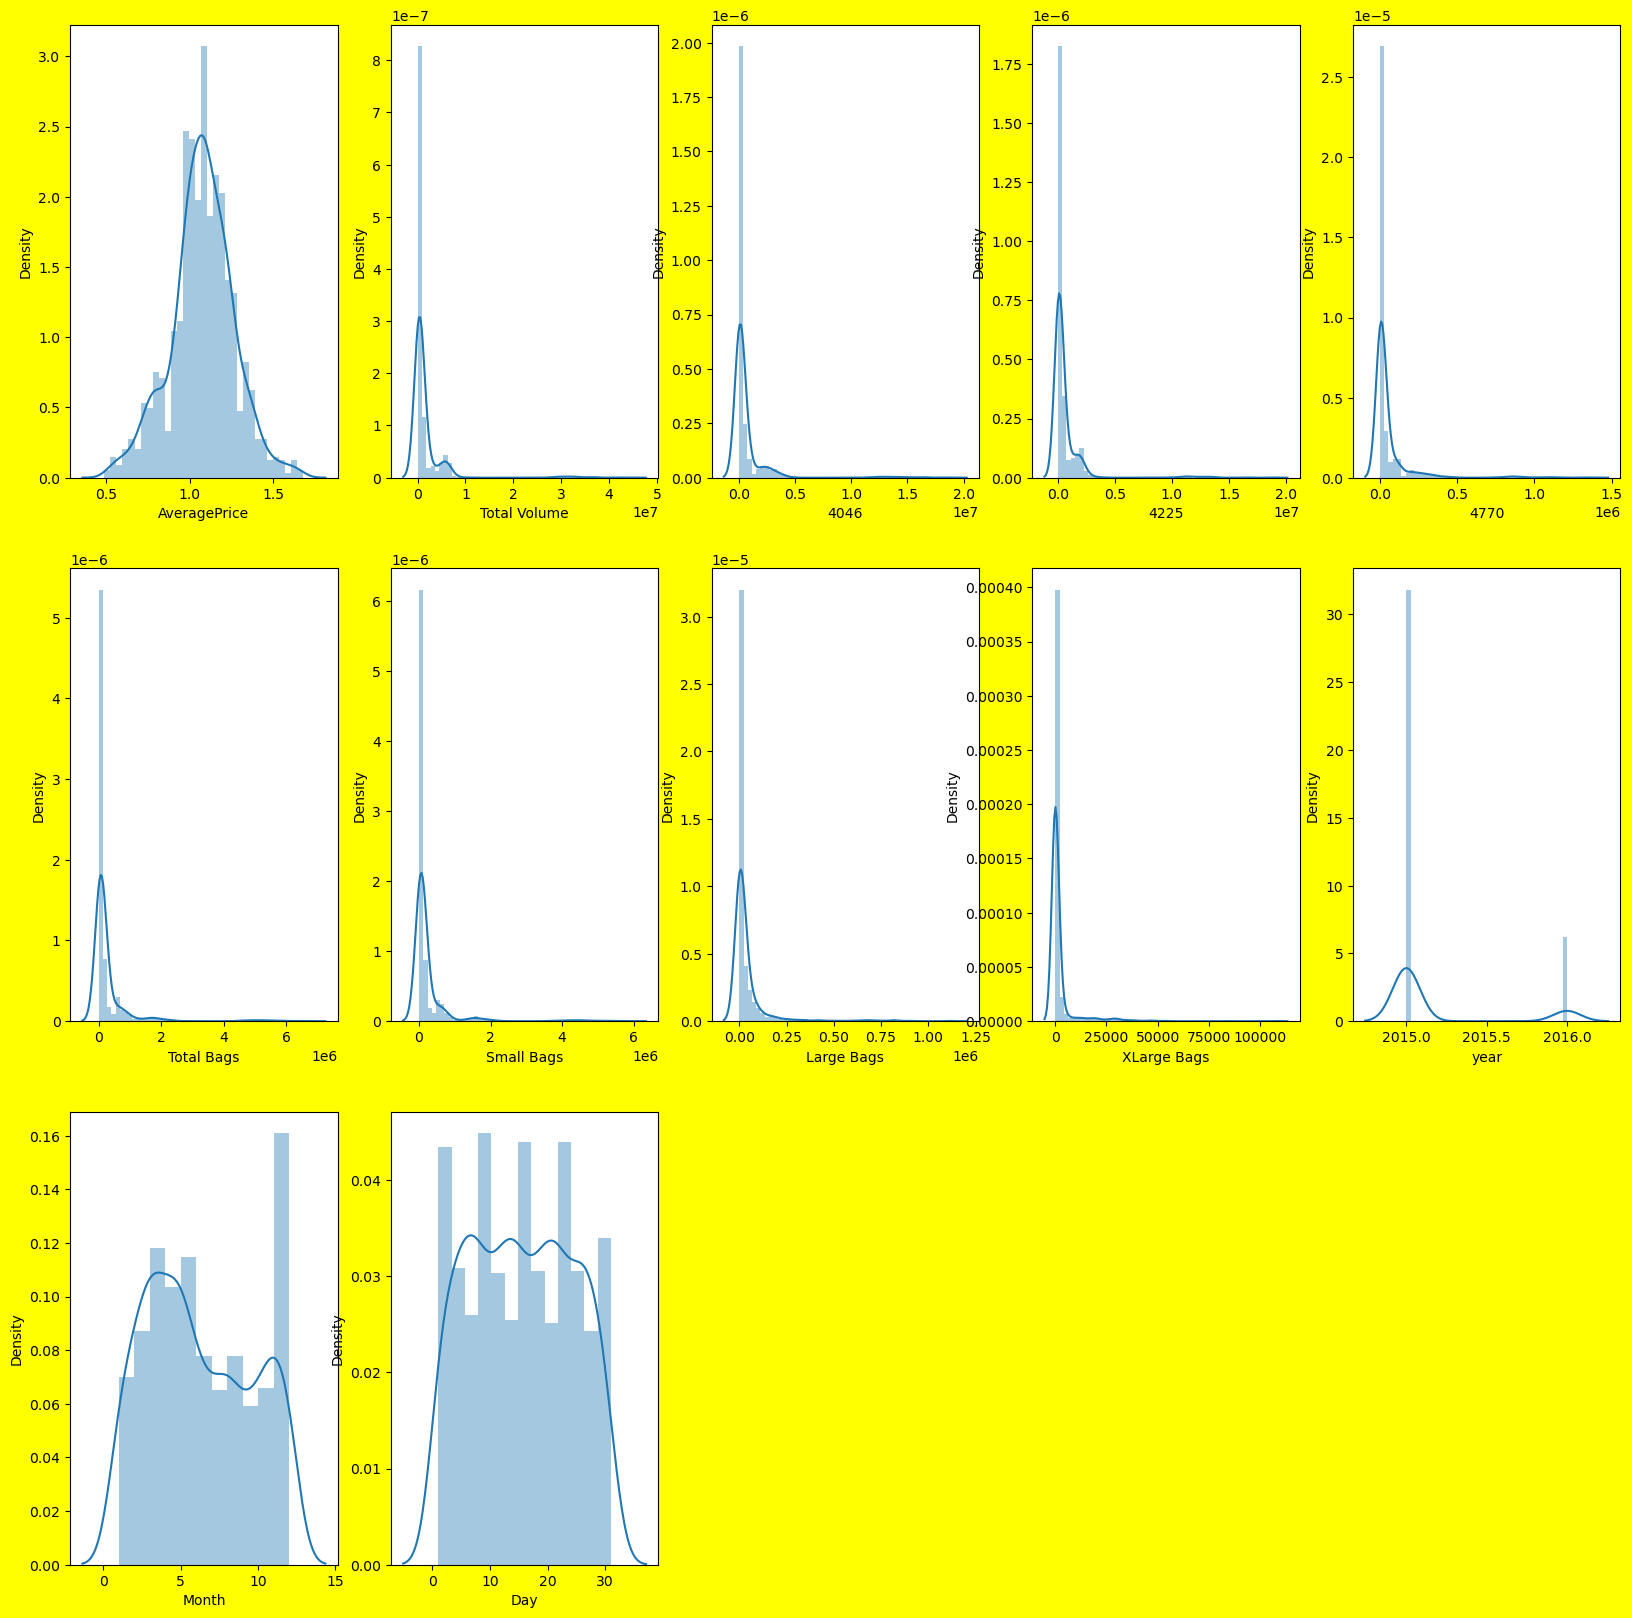

In [118]:
plt.figure(figsize=(20,20),facecolor='yellow')
number=1
for i in df[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year','Month','Day']]:
    if number<=12:
        ax=plt.subplot(3,5,number)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=10)
    number+=1
plt.show()                                                                                       

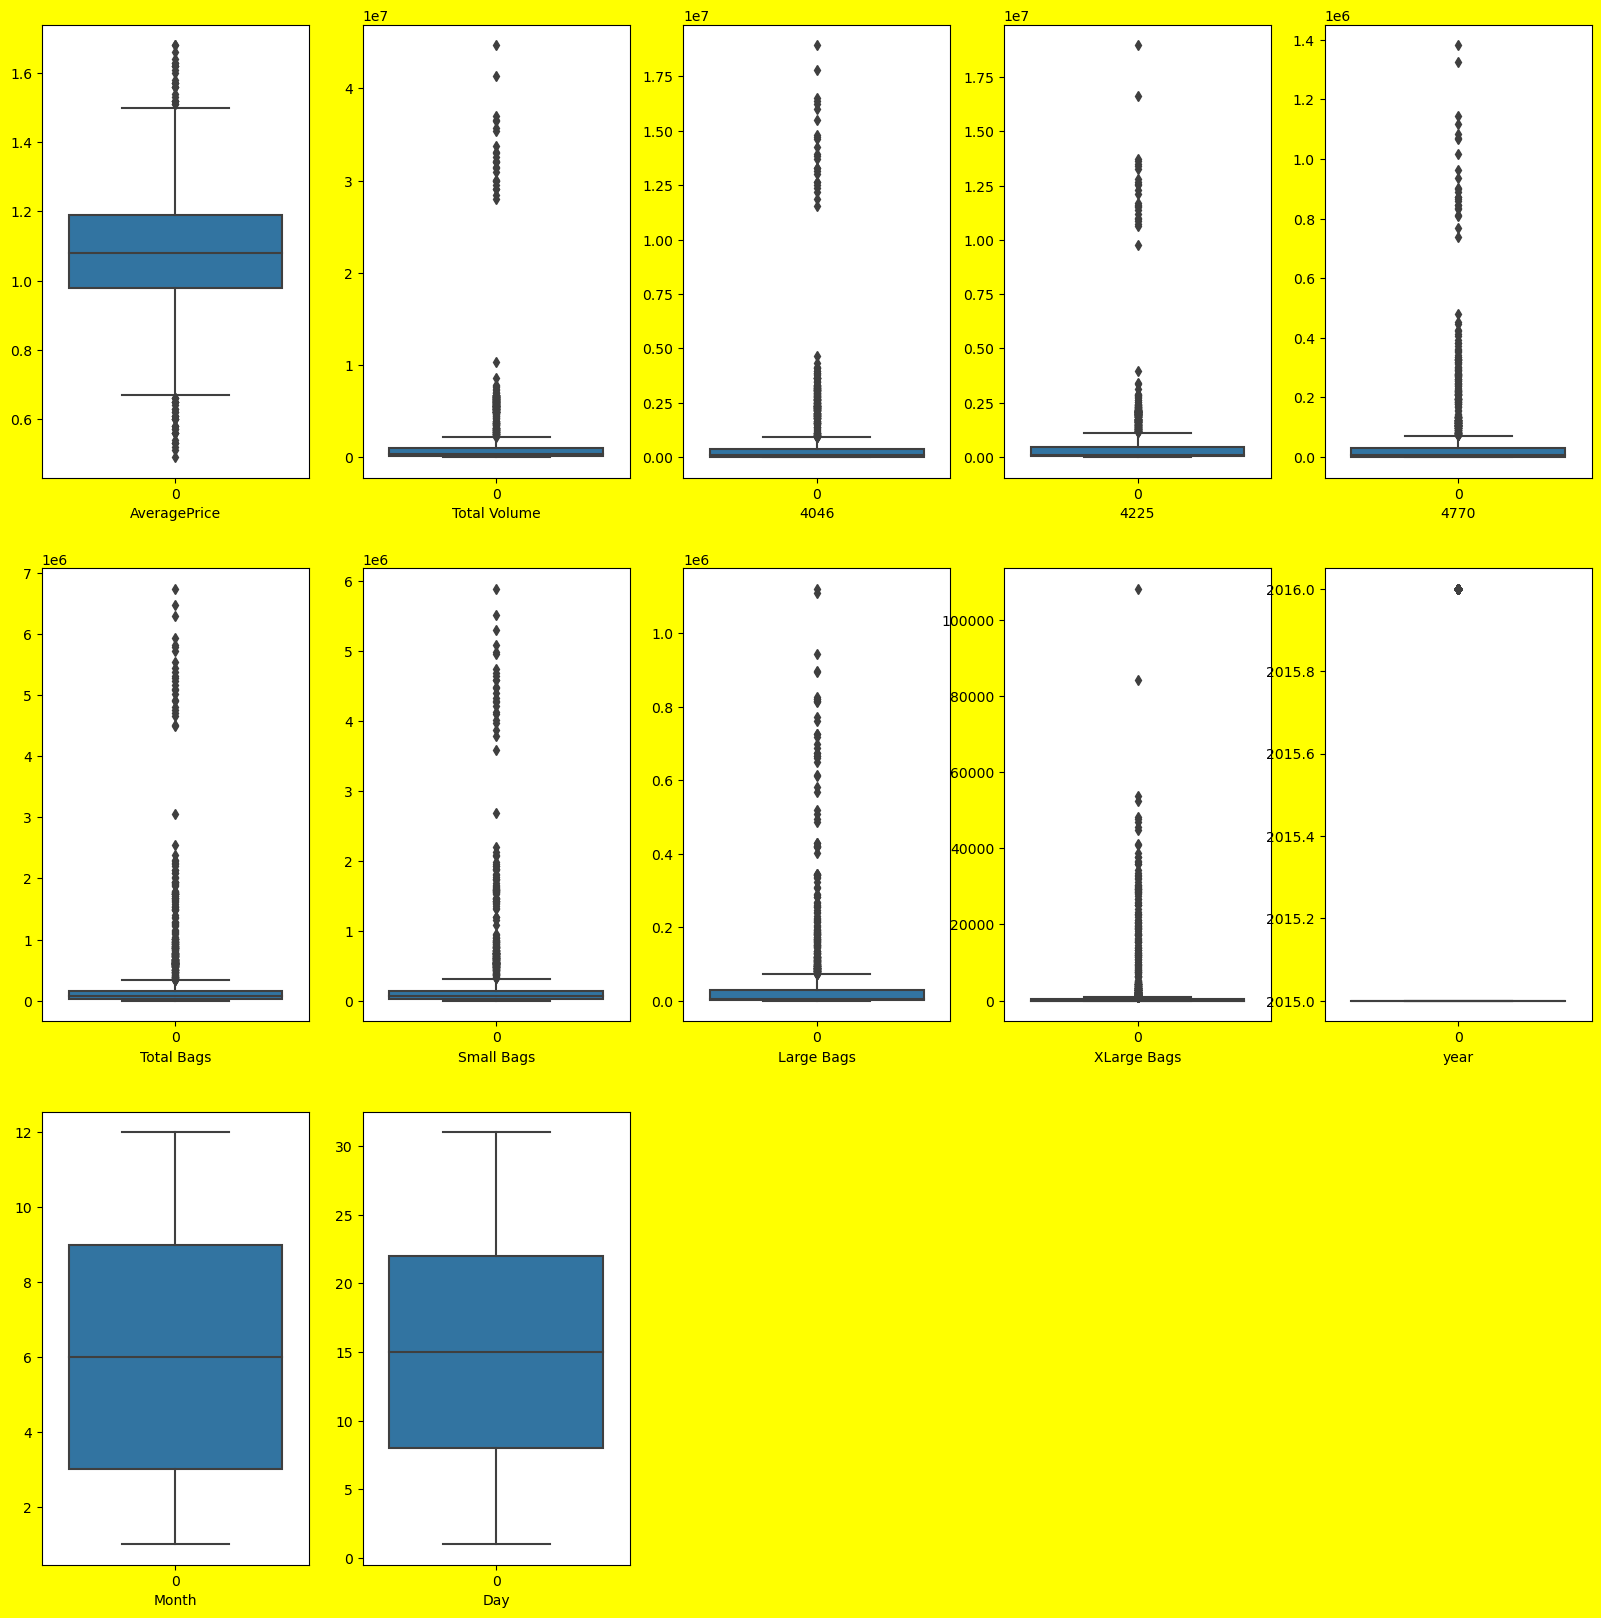

In [119]:
plt.figure(figsize=(20,20),facecolor='yellow')
number=1
for i in df[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year','Month','Day']]:
    if number<=12:
        ax=plt.subplot(3,5,number)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=10)
    number+=1
plt.show()

In [120]:
# Find the standard number of outlier and remove it

from scipy.stats import zscore

z_score=zscore(df[['AveragePrice','Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags', 
                   'XLarge Bags']])
data=np.abs(z_score)
filter_data=(data<3).all(axis=1)
df=df[filter_data]
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015.0,Albany,12.0,27.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015.0,Albany,12.0,20.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015.0,Albany,12.0,13.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015.0,Albany,12.0,6.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015.0,Albany,11.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016.0,Charlotte,10.0,16.0
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016.0,Charlotte,10.0,9.0
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016.0,Charlotte,10.0,2.0
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016.0,Charlotte,9.0,25.0


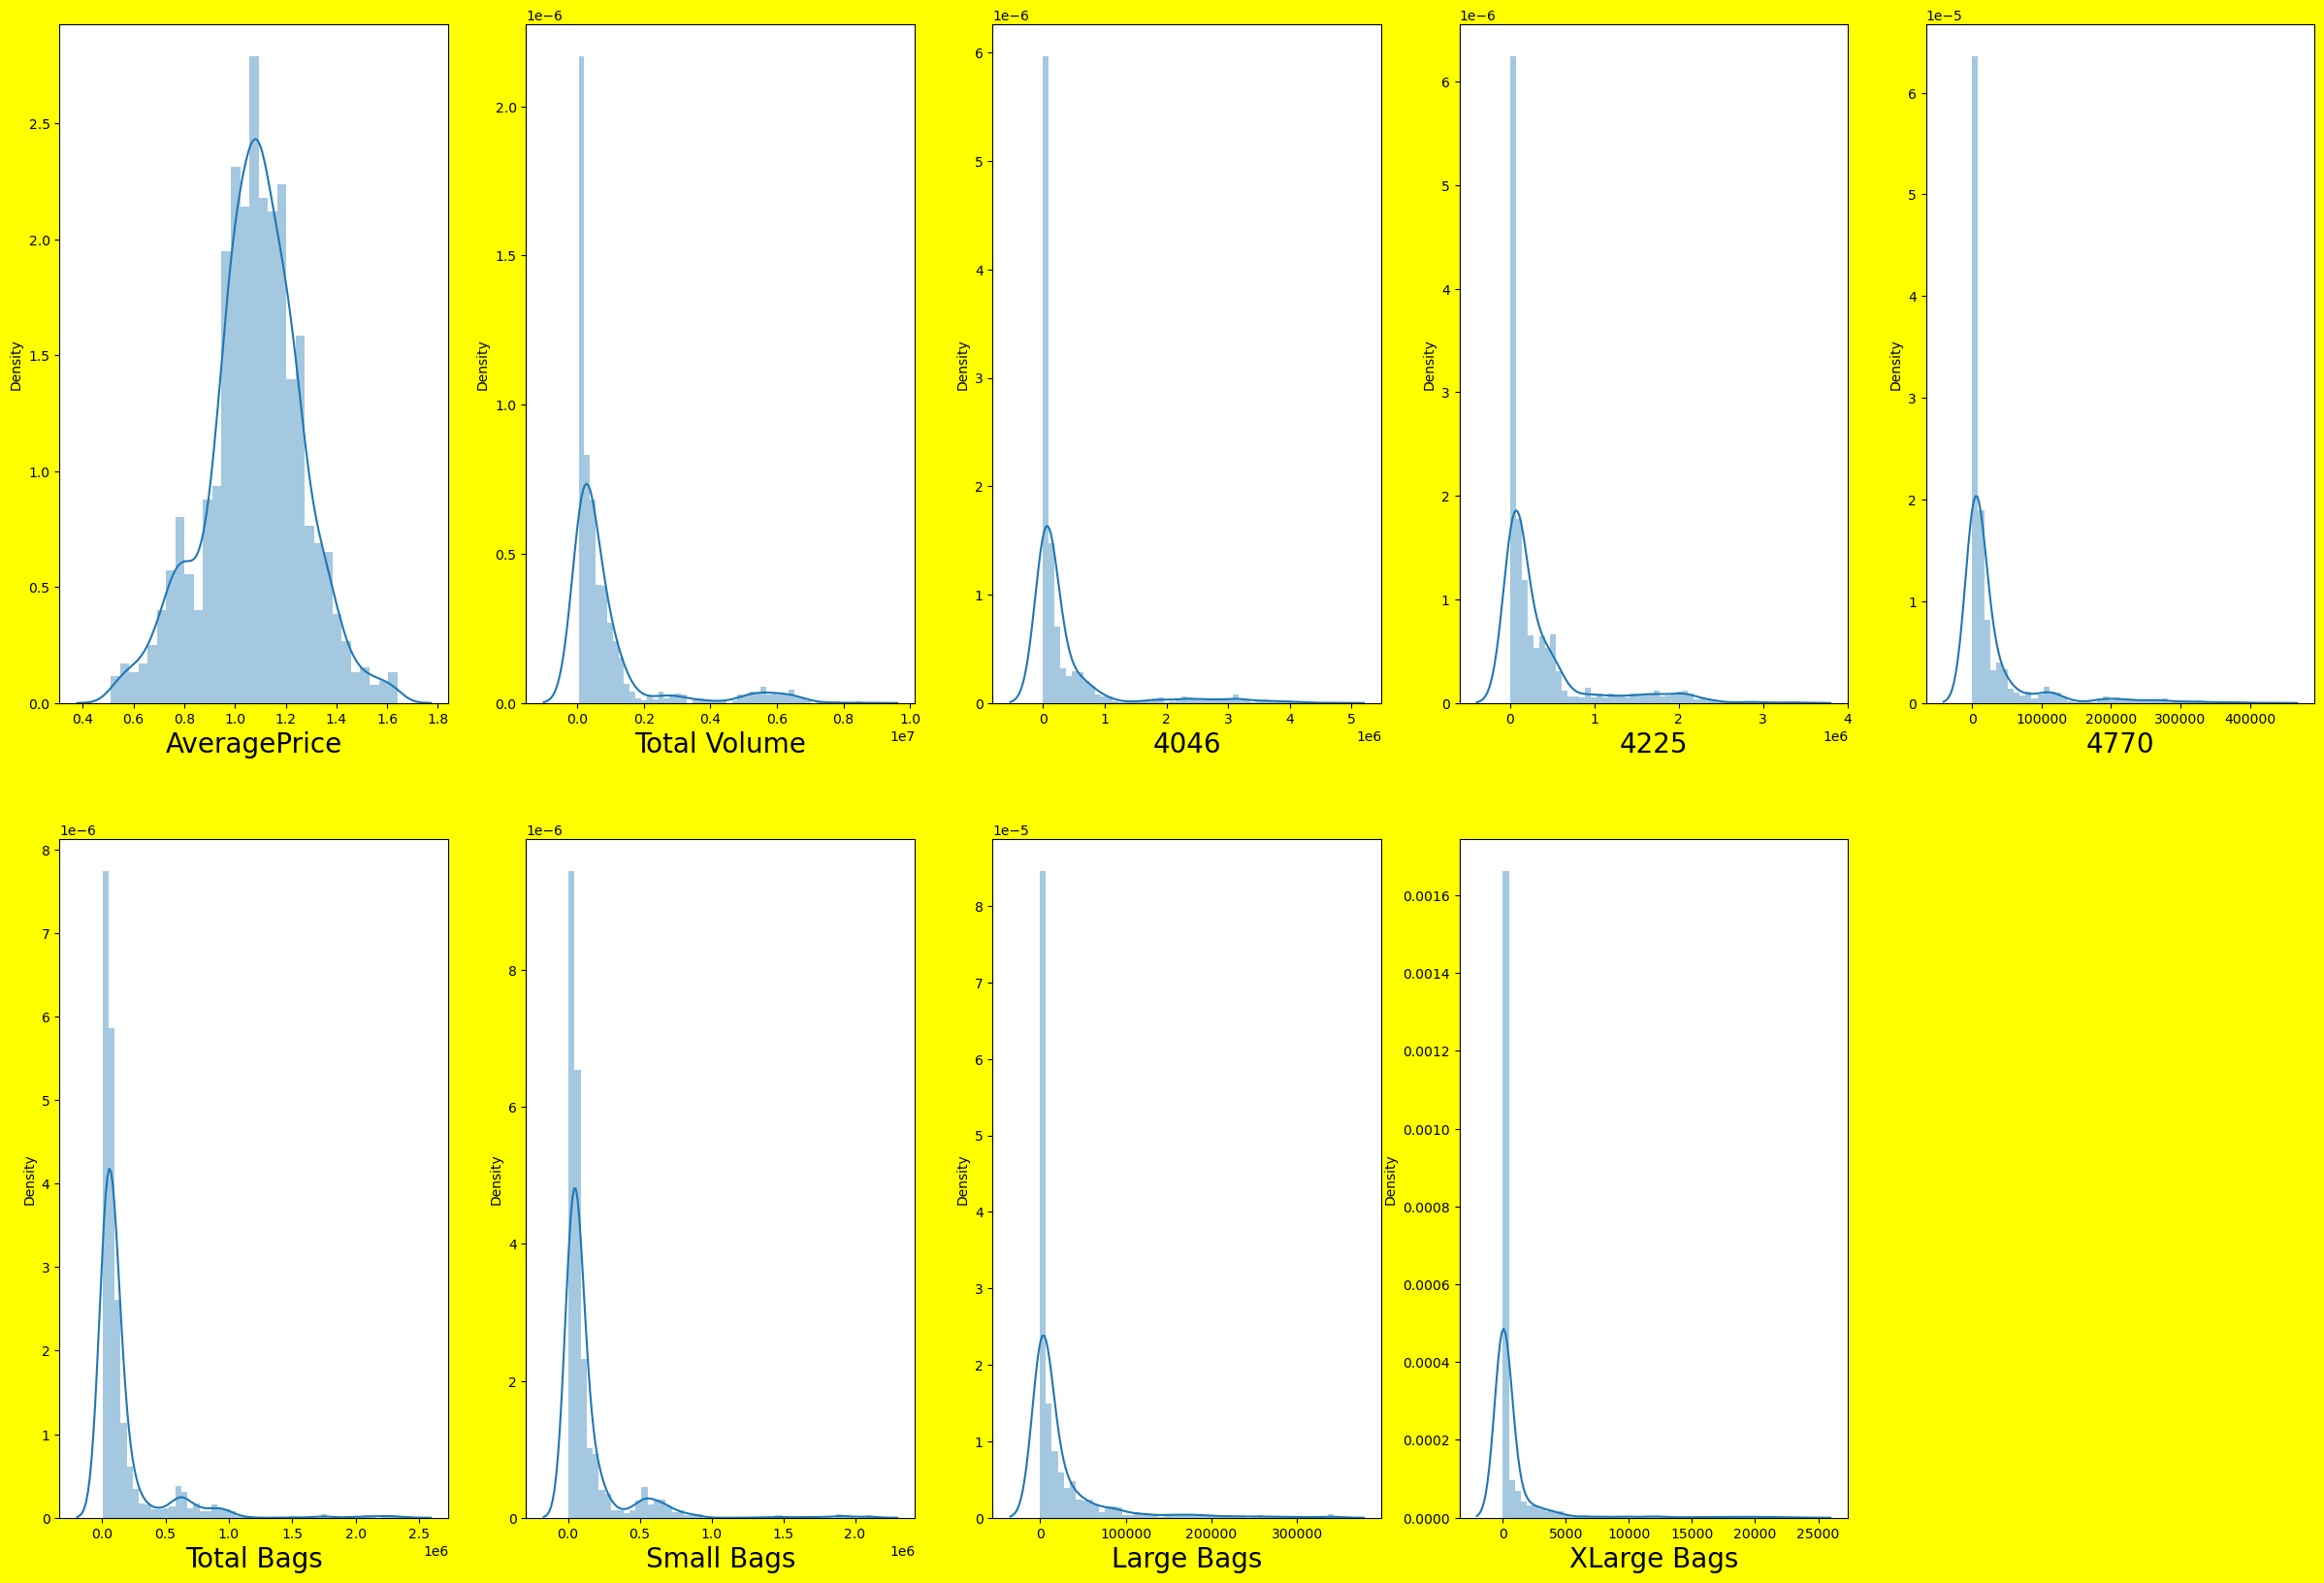

In [121]:
plt.figure(figsize=(30,20),facecolor='yellow')
number=1
for i in df[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags']]:
    if number<=9:
        ax=plt.subplot(2,5,number)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=20)
    number+=1
plt.show()      

In [122]:
df['region'].nunique()

50

In [123]:
# Encode the region column data into numbers

from sklearn.preprocessing import LabelEncoder

lab_encoder=LabelEncoder()

In [124]:
df1=lab_encoder.fit_transform(df['region'])
df['region']=df1

In [125]:
df['region'].value_counts()

region
0     67
2     65
3     65
4     62
1     54
31    51
5     50
44    49
9     47
26    44
19    41
6     40
12    40
38    38
42    37
47    34
22    34
7     31
34    30
28    29
17    29
49    27
25    25
48    25
11    24
41    24
8     23
13    23
32    22
36    21
29    21
46    19
15    19
24    18
23    17
37    17
10    17
18    16
45    16
35    16
39    15
14    14
30    13
16    13
27    12
33    12
20    10
40     9
43     8
21     3
Name: count, dtype: int64

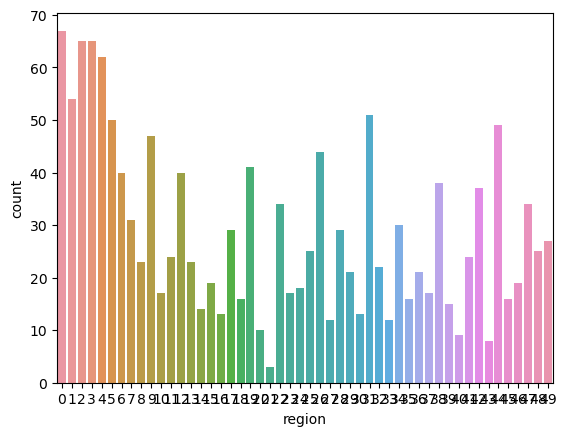

In [126]:
# check the frequency of class or cateogory

sns.countplot(x='region',data=df)
plt.show()

In [127]:
# convert multi level categories into binary categories using replace function 

df['region']=df['region'].replace({1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,
                                 15:0,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0,24:0,25:0,26:1,27:1,
                                 28:1,29:1,30:1,31:1,32:1,33:1,34:1,35:1,36:1,37:1,38:1,39:1,40:1,41:1,42:1,43:1,
                                 44:1,45:1,46:1,47:1,48:1,49:1})
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015.0,0,12.0,27.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015.0,0,12.0,20.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015.0,0,12.0,13.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015.0,0,12.0,6.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015.0,0,11.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016.0,0,10.0,16.0
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016.0,0,10.0,9.0
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016.0,0,10.0,2.0
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016.0,0,9.0,25.0


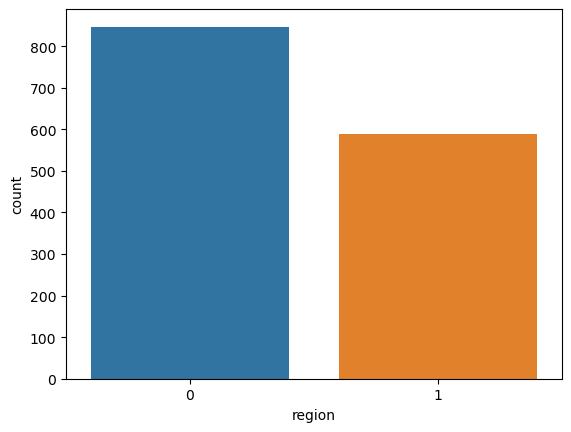

In [128]:
# Recheck the frequency of class or cateogory

sns.countplot(x='region',data=df)
plt.show()

In [129]:
# We can see data is imbalanced so we use sampling technique to convert data into balanced data

df['region'].value_counts()

region
0    847
1    589
Name: count, dtype: int64

In [130]:
x=df.drop(['region'],axis=1)
y=df.region

In [135]:
from imblearn.over_sampling import SMOTE

sm=SMOTE(random_state=40,k_neighbors=5,sampling_strategy=0.90)
x_samp,y_samp=sm.fit_resample(x,y)

In [136]:
from collections import Counter

print("The frequecy of class before fit : ",format(Counter(y)))
print("The frequecy of class after fit : ",format(Counter(y_samp)))

The frequecy of class before fit :  Counter({0: 847, 1: 589})
The frequecy of class after fit :  Counter({0: 847, 1: 762})


In [138]:
x_samp['region']=y_samp

In [143]:
x_samp

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,region
0,1.330000,6.423662e+04,1.036740e+03,5.445485e+04,48.160000,8696.870000,8603.620000,93.250000,0.000000,2015.0,12.000000,27.000000,0
1,1.350000,5.487698e+04,6.742800e+02,4.463881e+04,58.330000,9505.560000,9408.070000,97.490000,0.000000,2015.0,12.000000,20.000000,0
2,0.930000,1.182202e+05,7.947000e+02,1.091497e+05,130.500000,8145.350000,8042.210000,103.140000,0.000000,2015.0,12.000000,13.000000,0
3,1.080000,7.899215e+04,1.132000e+03,7.197641e+04,72.580000,5811.160000,5677.400000,133.760000,0.000000,2015.0,12.000000,6.000000,0
4,1.280000,5.103960e+04,9.414800e+02,4.383839e+04,75.780000,6183.950000,5986.260000,197.690000,0.000000,2015.0,11.000000,29.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,0.870536,6.012749e+05,3.889877e+05,1.506360e+05,12981.908361,48669.254830,44741.707544,3927.547286,0.000000,2015.0,5.513411,8.459767,1
1605,1.362219,3.245144e+05,1.503364e+04,2.039382e+05,1512.951581,104029.538343,92872.910346,11156.627997,0.000000,2015.0,1.444534,12.778135,1
1606,0.784521,4.871726e+06,2.376827e+06,1.558368e+06,270160.188848,666370.147420,550083.125836,115132.975871,1154.045713,2015.0,11.886986,13.678083,1
1607,0.781585,4.948113e+06,2.267351e+06,2.000074e+06,47546.167311,633141.292036,493620.500076,139235.206853,285.585107,2015.0,11.411321,10.120754,1


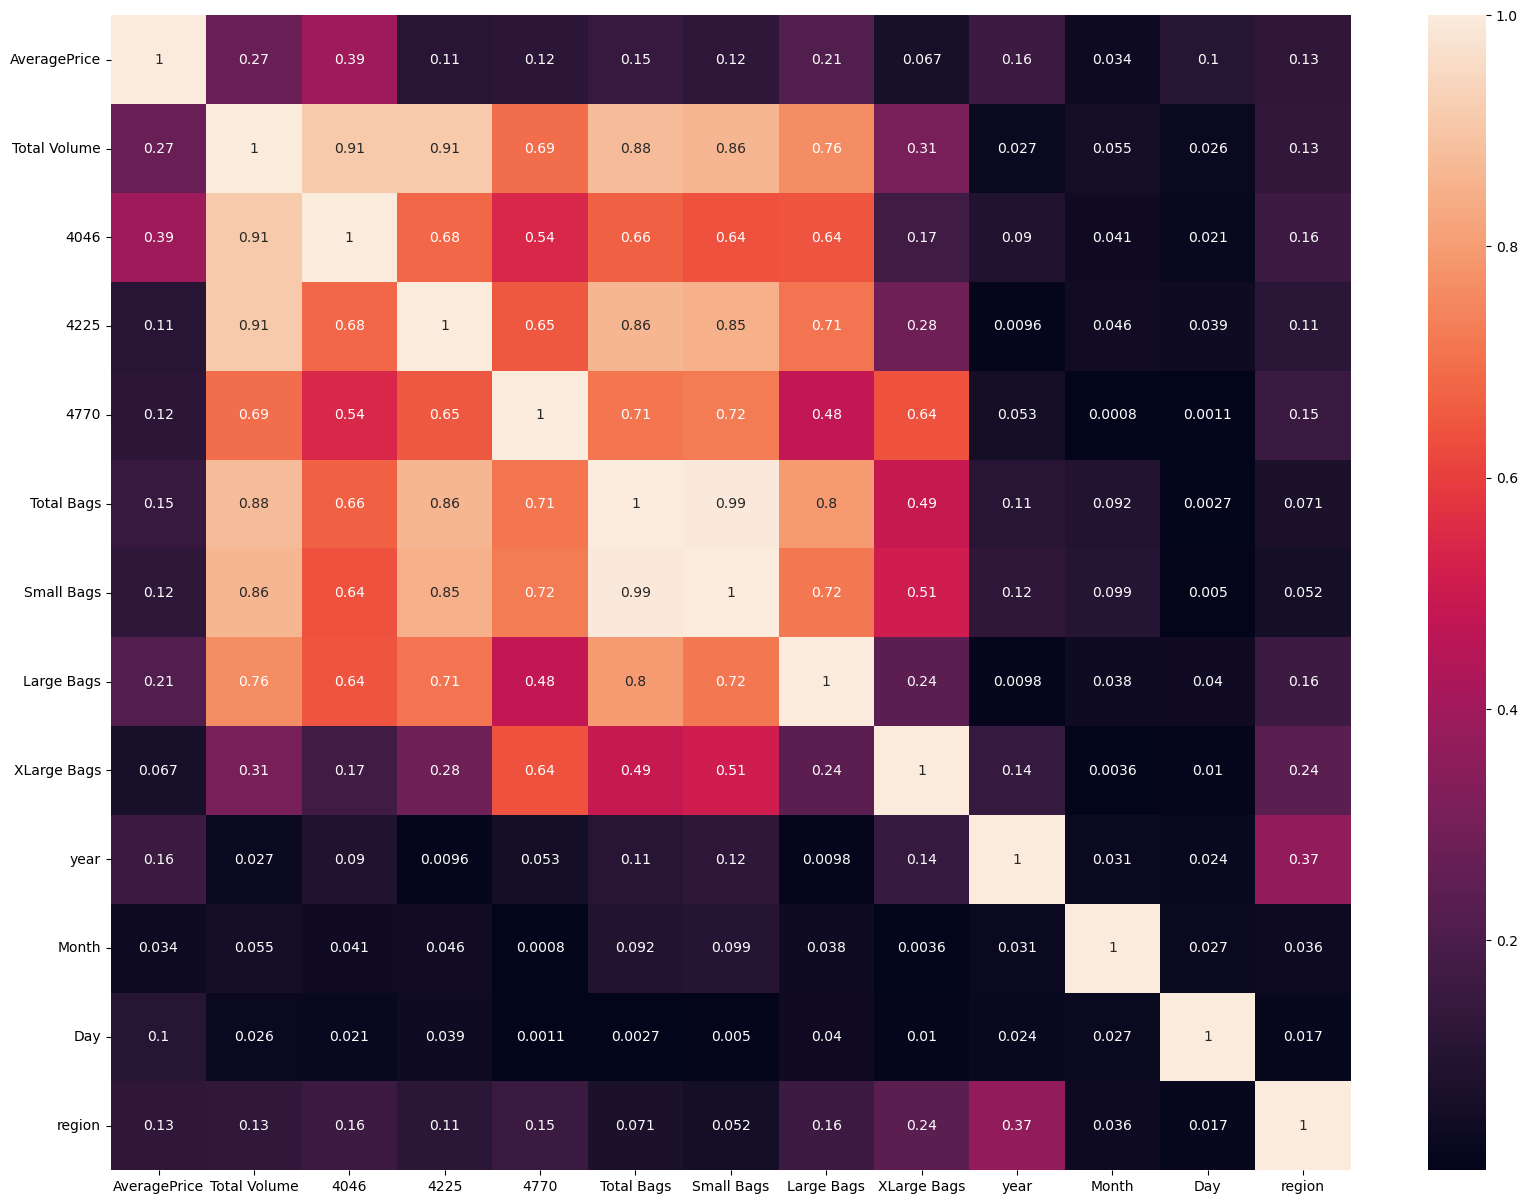

In [144]:
# Check the corelation and relationship b/w data (feature and Target)

plt.figure(figsize=(20,15))
sns.heatmap(x_samp.corr().abs(),annot=True)
plt.show()

# In this heapmap we can see there is corelation b/w Total Bags & Small Bags now we check the relationship with target data by
# graph

In [145]:
# Separate Input and Output Variable

X=x_samp.drop(['region'],axis=1)
Y=x_samp.region

In [146]:
X.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day'],
      dtype='object')

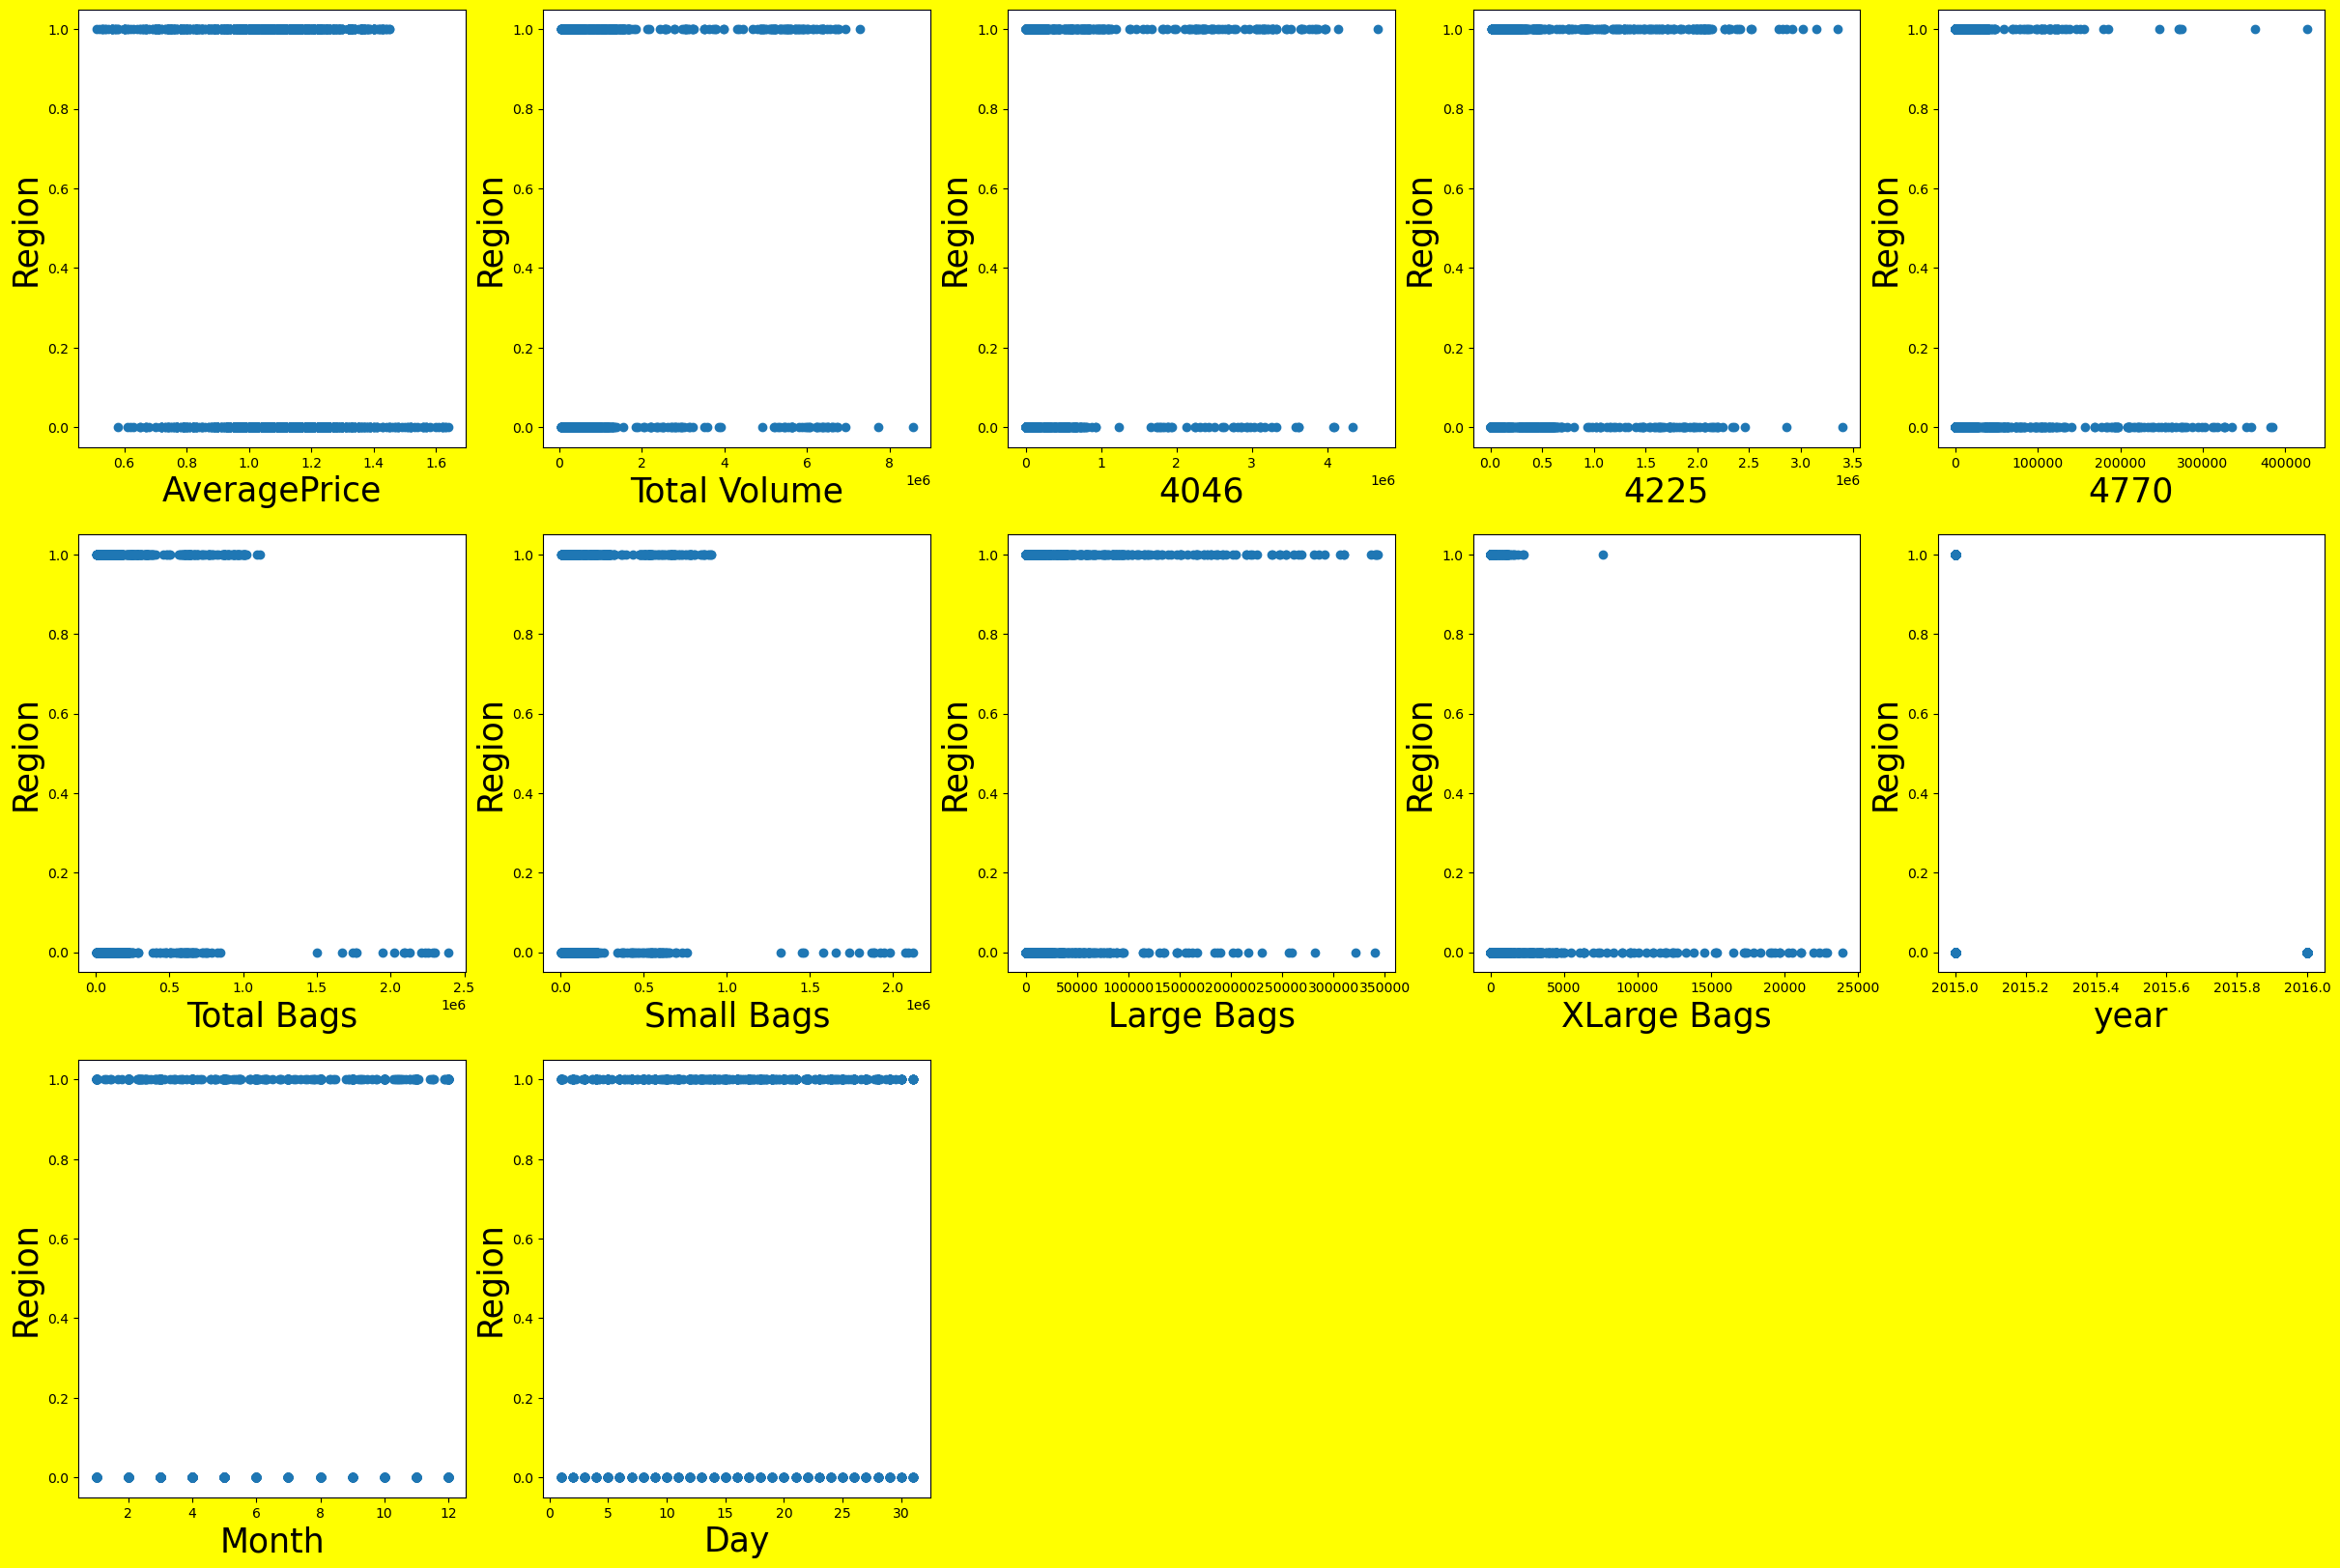

In [147]:
# Now we check the relation b/w Input and Output Variable

plt.figure(figsize=(30,20),facecolor='yellow')
number=1
for i in X:
    if number<=12:
        ax=plt.subplot(3,5,number)
        plt.scatter(X[i],Y)
        plt.xlabel(i,fontsize=25)
        plt.ylabel('Region',fontsize=25)
    number+=1
plt.show()

# After go through the graph we analyse every feature has a relation with target so we can not remove any feature data on the 
# basis of assumption untill we are not sure.

In [148]:
# Now standarised the data means take all data on one scale.

from sklearn.preprocessing import StandardScaler

x_scaler=StandardScaler()
x_scaler=x_scaler.fit_transform(X)
x_scaler

array([[ 1.34127834, -0.56944589, -0.47859679, ..., -0.38743673,
         1.75583444,  1.33733813],
       [ 1.44768801, -0.57567222, -0.4790718 , ..., -0.38743673,
         1.75583444,  0.52245086],
       [-0.78691496, -0.53353428, -0.47891399, ..., -0.38743673,
         1.75583444, -0.29243642],
       ...,
       [-1.56093593,  2.62864877,  2.63493247, ..., -0.38743673,
         1.72216955, -0.2134991 ],
       [-1.57655502,  2.67946417,  2.49146205, ..., -0.38743673,
         1.580477  , -0.62761658],
       [-1.67817469, -0.10326416,  0.22403126, ..., -0.38743673,
        -1.11864728, -0.34506333]])

In [149]:
# Split the dataset into Training and Test Data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_scaler,Y,test_size=.20,random_state=42)

In [150]:
# Knn Model to Solve Classification Problem

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [153]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [154]:
train_pred=knn.predict(x_train)
train_pred

array([0, 1, 1, ..., 1, 1, 1])

In [156]:
train_accu_score=accuracy_score(y_train,train_pred)
accu_score

0.8679098679098679

In [157]:
test_pred=knn.predict(x_test)
test_pred

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,

In [160]:
conf_mat=confusion_matrix(y_test,test_pred)
conf_mat

array([[146,  43],
       [ 19, 114]], dtype=int64)

In [158]:
test_accu_score=accuracy_score(y_test,test_pred)
test_accu_score

0.8074534161490683

In [161]:
from sklearn.metrics import classification_report

In [163]:
class_rep=classification_report(y_test,test_pred)
print(class_rep)

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       189
           1       0.73      0.86      0.79       133

    accuracy                           0.81       322
   macro avg       0.81      0.81      0.81       322
weighted avg       0.82      0.81      0.81       322



In [ ]:
# We can see that accuracy_score of Knn Model is good. 
# But we will try other model also ,may be that model can performn more better.

In [ ]:
# Logistic Regression Model

In [169]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
lm.fit(x_train,y_train)

LogisticRegression()

In [170]:
test_pred1=lm.predict(x_test)
test_pred1

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,

In [171]:
test_accu_score1=accuracy_score(y_test,test_pred1)
test_accu_score1

0.717391304347826

In [ ]:
# Logisctic Regression Model is not performing batter than Knn Model.
# Now we will try other model,may be that model can performn more better.

In [172]:
# Decision Tree model

from sklearn.tree import DecisionTreeClassifier
dec_tree=DecisionTreeClassifier()
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [173]:
test_pred2=dec_tree.predict(x_test)
test_pred2

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

In [174]:
test_accu_score2=accuracy_score(y_test,test_pred2)
test_accu_score2

0.953416149068323

In [ ]:
# Decision Tree Model is performing better than other model.
# Now we will try other model,may be that model can performn more better.

In [175]:
# Random Forest Model

from sklearn.ensemble import RandomForestClassifier
ran_fort=RandomForestClassifier()
ran_fort.fit(x_train,y_train)

RandomForestClassifier()

In [178]:
test_pred3=ran_fort.predict(x_test)
test_pred3

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [179]:
test_accu_score3=accuracy_score(y_test,test_pred3)
test_accu_score3

0.9906832298136646

In [ ]:
# Random Forest Model is performing better than all other model.
# Now we will try other model,may be that model can performn more better.

In [180]:
# Suppport Vector Machine Model

from sklearn.svm import SVC
svc=SVC()  
svc.fit(x_train,y_train)

SVC()

In [183]:
test_pred4=svc.predict(x_test)
test_pred4

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,

In [184]:
test_accu_score4=accuracy_score(y_test,test_pred4)
test_accu_score4

0.7484472049689441

In [186]:
models = pd.DataFrame({'Model': ['KNN Model','Linear_Regression','Decision Tree','Random_Forest','Support Vector Machines'],
                       'Accuracy_score':[test_accu_score,test_accu_score1,test_accu_score2,test_accu_score3,test_accu_score4]})
models

,Model,Accuracy_score
0,KNN Model,0.807453
1,Linear_Regression,0.717391
2,Decision Tree,0.953416
3,Random_Forest,0.990683
4,Support Vector Machines,0.748447


In [ ]:
# Now as per above DataFrame report we can say Random Forest is performing superb and batter than other model
# Still we use ROC AUC Metrics to reconfirm

In [195]:
from sklearn.metrics import roc_curve,auc

data = {'Knn Model': knn,'Linear_Regression':lm,'Decision Tree':dec_tree,'Random_Forest':ran_fort,
                     'Support Vector Machines':svc}
data

{'Knn Model': KNeighborsClassifier(),
 'Linear_Regression': LogisticRegression(),
 'Decision Tree': DecisionTreeClassifier(),
 'Random_Forest': RandomForestClassifier(),
 'Support Vector Machines': SVC()}

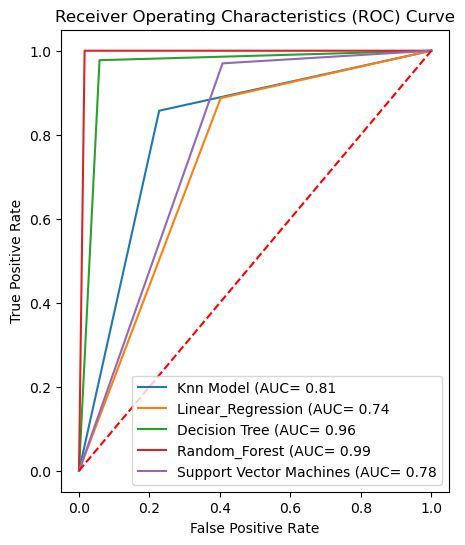

In [196]:
plt.figure(figsize=(5,6))
for data_name,data_object in data.items():
    data_object.fit(x_train,y_train)
    y_pred=data_object.predict(x_test)
    fpr,tpr,thrashold=roc_curve(y_test,y_pred)
    roc_auc=auc(fpr,tpr)
    plt.plot(fpr,tpr,label='{} (AUC= {:.2f}'.format(data_name,roc_auc))
    
plt.plot([0,1],[0,1],linestyle='--',color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC) Curve')
plt.legend(loc='lower right')
    
#show the plot
plt.show()       

In [ ]:
# Now in this ROC AUC metric we can see Random forest model make the highest curve, means random forest has the more significant
# relation with the data so Random forest model is the best model.

In [ ]:
# Hyperparameter Tunnning for Random forest Model

In [199]:
params={'criterion':["gini","entropy"],'max_depth':[10,15],'min_samples_leaf':[5,6],'min_samples_split':[10,15],
       'max_leaf_nodes':[10,15]}
params

{'criterion': ['gini', 'entropy'],
 'max_depth': [10, 15],
 'min_samples_leaf': [5, 6],
 'min_samples_split': [10, 15],
 'max_leaf_nodes': [10, 15]}

In [203]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=ran_fort,param_grid=params,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15], 'max_leaf_nodes': [10, 15],
                         'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 15]})

In [204]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 15}

In [205]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, max_leaf_nodes=15, min_samples_leaf=5,
                       min_samples_split=15)

In [206]:
# Final Model

final_model=RandomForestClassifier(max_depth=10, max_leaf_nodes=15, min_samples_leaf=5,min_samples_split=15)
final_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, max_leaf_nodes=15, min_samples_leaf=5,
                       min_samples_split=15)

In [207]:
predd=final_model.predict(x_test)
predd

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

In [209]:
accuracy_score(y_test,predd)

0.9254658385093167

In [210]:
# Now After Hypertunning we can also say model is not underfitted and overfitted so Rando forest is the best model for this 
# Classification problem

In [211]:
# END OF THE PROJECT 2